# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
# data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

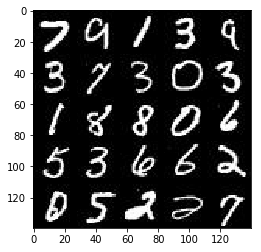

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

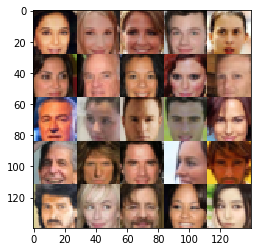

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_input = tf.placeholder(tf.float32, shape=(None, image_width, image_height, image_channels))
    
    z = tf.placeholder(tf.float32, shape=(None, z_dim))
    
    learning_rate = tf.placeholder(tf.float32)
    print(learning_rate)
    

    return real_input, z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tensor("Placeholder_2:0", dtype=float32)
Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [12]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha=0.2
    with tf.variable_scope("discriminator", reuse=reuse):
        
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
#         x1 = tf.nn.dropout(x1, 0.5)
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * x2, x2)
#         x2 = tf.nn.dropout(x2, 0.5)
        
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x2, training=True)
        relu3 = tf.maximum(alpha * x3, x3)
#         x3 = tf.nn.dropout(x3, 0.5)

        
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [16]:
def generator(z, out_channel_dim,is_train=True):
   
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    
    # TODO: Implement Function
    with tf.variable_scope("generator",reuse = not is_train):
        x1 = tf.layers.dense(z, 4*4*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 4, 4, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(0.2 * x1, x1)
#         x1 = tf.nn.dropout(x1, 0.5)
       
        
        x2 = tf.layers.conv2d_transpose(x1,256, 5, strides=2, padding='same',
                                       kernel_initializer=tf.contrib.layers.xavier_initializer())
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(0.2 * x2, x2)
#         x2 = tf.nn.dropout(x2, 0.5)
        
        
       #28*28*128
        x2 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same',
                                       kernel_initializer=tf.contrib.layers.xavier_initializer())
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(0.2 * x2, x2)
#         x2 = tf.nn.dropout(x2, 0.5)

        # Output layer
        logits = tf.layers.conv2d_transpose(x2, out_channel_dim, 5, strides=2, padding='same')
        logits = tf.image.resize_images(logits,(28,28))
        out = tf.tanh(logits)
    return out
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [17]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    
    g_model = generator(input_z, out_channel_dim)
    data_model_real, data_logits_real = discriminator(input_real)
    data_model_fake, data_logits_fake = discriminator(g_model, reuse=True)

    data_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=data_logits_real, labels=tf.ones_like(data_model_real)))
    data_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=data_logits_fake, labels=tf.zeros_like(data_model_fake)))
    generator_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=data_logits_fake, labels=tf.ones_like(data_model_fake)))

    data_loss = data_loss_real + data_loss_fake

    return data_loss, generator_loss

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [18]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    training_vars = tf.trainable_variables()
    discriminator_vars = [var for var in training_vars if var.name.startswith('discriminator')]
    generator_vars = [var for var in training_vars if var.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        discriminator_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=discriminator_vars)
        generator_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=generator_vars)
    
    return discriminator_train_opt, generator_train_opt

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [19]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [20]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    step = 0
    
    samples, width, height, channels = data_shape
    
    input_real, input_z, lr = model_inputs(width, height, channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, channels)
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    saver = tf.train.Saver()

    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                

                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                batch_images = batch_images * 2.0

                # Run optimizers
                sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                sess.run(g_train_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                
                steps += 1
                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_real: batch_images, input_z: batch_z})
                    train_loss_g = g_loss.eval({input_real: batch_images, input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, 16, input_z, channels, data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Tensor("Placeholder_2:0", dtype=float32)
Epoch 1/2... Discriminator Loss: 2.1433... Generator Loss: 0.2498
Epoch 1/2... Discriminator Loss: 1.7009... Generator Loss: 0.4146
Epoch 1/2... Discriminator Loss: 1.4326... Generator Loss: 0.5593
Epoch 1/2... Discriminator Loss: 1.3975... Generator Loss: 0.5885
Epoch 1/2... Discriminator Loss: 1.3980... Generator Loss: 0.5633
Epoch 1/2... Discriminator Loss: 1.5122... Generator Loss: 0.5114
Epoch 1/2... Discriminator Loss: 1.3201... Generator Loss: 0.6026
Epoch 1/2... Discriminator Loss: 1.3990... Generator Loss: 0.5795
Epoch 1/2... Discriminator Loss: 1.2232... Generator Loss: 0.6966
Epoch 1/2... Discriminator Loss: 1.2397... Generator Loss: 0.6824


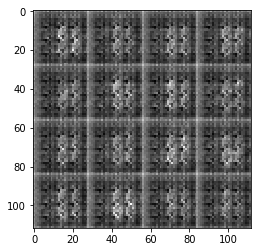

Epoch 1/2... Discriminator Loss: 1.3469... Generator Loss: 0.6092
Epoch 1/2... Discriminator Loss: 1.3791... Generator Loss: 0.6175
Epoch 1/2... Discriminator Loss: 1.3724... Generator Loss: 0.6327
Epoch 1/2... Discriminator Loss: 1.4047... Generator Loss: 0.6227
Epoch 1/2... Discriminator Loss: 1.3723... Generator Loss: 0.6254
Epoch 1/2... Discriminator Loss: 1.3615... Generator Loss: 0.6393
Epoch 1/2... Discriminator Loss: 1.3516... Generator Loss: 0.6694
Epoch 1/2... Discriminator Loss: 1.3340... Generator Loss: 0.6752
Epoch 1/2... Discriminator Loss: 1.3627... Generator Loss: 0.6728
Epoch 1/2... Discriminator Loss: 1.2959... Generator Loss: 0.7073


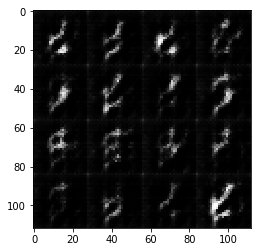

Epoch 1/2... Discriminator Loss: 1.3788... Generator Loss: 0.6955
Epoch 1/2... Discriminator Loss: 1.3168... Generator Loss: 0.6860
Epoch 1/2... Discriminator Loss: 1.3671... Generator Loss: 0.6493
Epoch 1/2... Discriminator Loss: 1.3118... Generator Loss: 0.6800
Epoch 1/2... Discriminator Loss: 1.3587... Generator Loss: 0.6814
Epoch 1/2... Discriminator Loss: 1.2849... Generator Loss: 0.6621
Epoch 1/2... Discriminator Loss: 1.2905... Generator Loss: 0.6890
Epoch 1/2... Discriminator Loss: 1.3125... Generator Loss: 0.6802
Epoch 1/2... Discriminator Loss: 1.3323... Generator Loss: 0.6809
Epoch 1/2... Discriminator Loss: 1.3173... Generator Loss: 0.6983


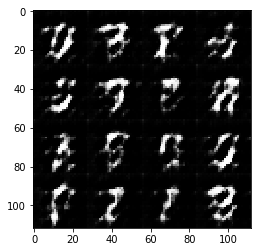

Epoch 1/2... Discriminator Loss: 1.3118... Generator Loss: 0.6803
Epoch 1/2... Discriminator Loss: 1.3296... Generator Loss: 0.6690
Epoch 1/2... Discriminator Loss: 1.2229... Generator Loss: 0.7310
Epoch 1/2... Discriminator Loss: 1.2767... Generator Loss: 0.7185
Epoch 1/2... Discriminator Loss: 1.2846... Generator Loss: 0.7162
Epoch 1/2... Discriminator Loss: 1.3157... Generator Loss: 0.6757
Epoch 1/2... Discriminator Loss: 1.3309... Generator Loss: 0.6967
Epoch 1/2... Discriminator Loss: 1.3197... Generator Loss: 0.6759
Epoch 1/2... Discriminator Loss: 1.3586... Generator Loss: 0.6649
Epoch 1/2... Discriminator Loss: 1.3414... Generator Loss: 0.6914


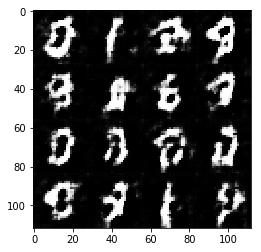

Epoch 1/2... Discriminator Loss: 1.2819... Generator Loss: 0.6839
Epoch 1/2... Discriminator Loss: 1.3202... Generator Loss: 0.6961
Epoch 1/2... Discriminator Loss: 1.2707... Generator Loss: 0.7066
Epoch 1/2... Discriminator Loss: 1.2380... Generator Loss: 0.7431
Epoch 1/2... Discriminator Loss: 1.2907... Generator Loss: 0.7215
Epoch 1/2... Discriminator Loss: 1.2527... Generator Loss: 0.7388
Epoch 1/2... Discriminator Loss: 1.2457... Generator Loss: 0.7529
Epoch 1/2... Discriminator Loss: 1.3594... Generator Loss: 0.6996
Epoch 1/2... Discriminator Loss: 1.2690... Generator Loss: 0.7285
Epoch 1/2... Discriminator Loss: 1.3628... Generator Loss: 0.6535


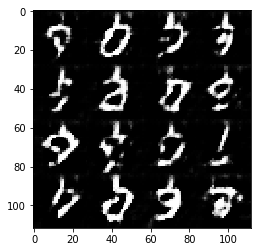

Epoch 1/2... Discriminator Loss: 1.2924... Generator Loss: 0.6837
Epoch 1/2... Discriminator Loss: 1.3216... Generator Loss: 0.7048
Epoch 1/2... Discriminator Loss: 1.2490... Generator Loss: 0.7367
Epoch 1/2... Discriminator Loss: 1.2471... Generator Loss: 0.7086
Epoch 1/2... Discriminator Loss: 1.3487... Generator Loss: 0.7008
Epoch 1/2... Discriminator Loss: 1.3086... Generator Loss: 0.6945
Epoch 1/2... Discriminator Loss: 1.2689... Generator Loss: 0.7228
Epoch 1/2... Discriminator Loss: 1.2677... Generator Loss: 0.7375
Epoch 1/2... Discriminator Loss: 1.2560... Generator Loss: 0.6892
Epoch 1/2... Discriminator Loss: 1.2903... Generator Loss: 0.7027


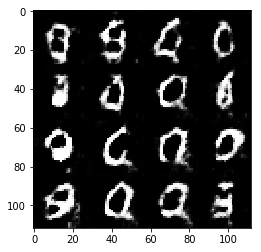

Epoch 1/2... Discriminator Loss: 1.3539... Generator Loss: 0.6505
Epoch 1/2... Discriminator Loss: 1.3439... Generator Loss: 0.6733
Epoch 1/2... Discriminator Loss: 1.3060... Generator Loss: 0.6848
Epoch 1/2... Discriminator Loss: 1.2783... Generator Loss: 0.7131
Epoch 1/2... Discriminator Loss: 1.3323... Generator Loss: 0.7053
Epoch 1/2... Discriminator Loss: 1.2825... Generator Loss: 0.7163
Epoch 1/2... Discriminator Loss: 1.3300... Generator Loss: 0.6796
Epoch 1/2... Discriminator Loss: 1.3193... Generator Loss: 0.6994
Epoch 1/2... Discriminator Loss: 1.3260... Generator Loss: 0.7302
Epoch 1/2... Discriminator Loss: 1.2995... Generator Loss: 0.7043


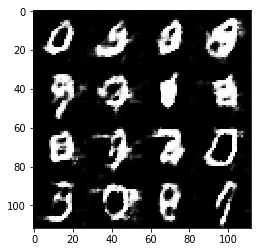

Epoch 1/2... Discriminator Loss: 1.3359... Generator Loss: 0.6915
Epoch 1/2... Discriminator Loss: 1.3388... Generator Loss: 0.6720
Epoch 1/2... Discriminator Loss: 1.3061... Generator Loss: 0.7009
Epoch 1/2... Discriminator Loss: 1.3105... Generator Loss: 0.7069
Epoch 1/2... Discriminator Loss: 1.3177... Generator Loss: 0.6980
Epoch 1/2... Discriminator Loss: 1.2141... Generator Loss: 0.7640
Epoch 1/2... Discriminator Loss: 1.2260... Generator Loss: 0.7130
Epoch 1/2... Discriminator Loss: 1.3720... Generator Loss: 0.6788
Epoch 1/2... Discriminator Loss: 1.3025... Generator Loss: 0.6901
Epoch 1/2... Discriminator Loss: 1.2780... Generator Loss: 0.6918


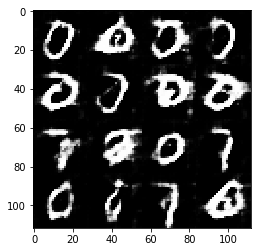

Epoch 1/2... Discriminator Loss: 1.3281... Generator Loss: 0.6871
Epoch 1/2... Discriminator Loss: 1.3009... Generator Loss: 0.6787
Epoch 1/2... Discriminator Loss: 1.2927... Generator Loss: 0.6853
Epoch 1/2... Discriminator Loss: 1.2943... Generator Loss: 0.7123
Epoch 1/2... Discriminator Loss: 1.2085... Generator Loss: 0.7629
Epoch 1/2... Discriminator Loss: 1.4113... Generator Loss: 0.6325
Epoch 1/2... Discriminator Loss: 1.3340... Generator Loss: 0.6971
Epoch 1/2... Discriminator Loss: 1.3642... Generator Loss: 0.6671
Epoch 1/2... Discriminator Loss: 1.3103... Generator Loss: 0.6923
Epoch 1/2... Discriminator Loss: 1.2987... Generator Loss: 0.7055


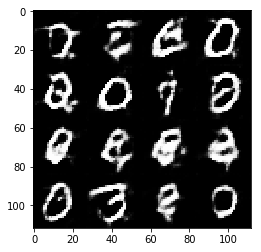

Epoch 1/2... Discriminator Loss: 1.3329... Generator Loss: 0.6880
Epoch 1/2... Discriminator Loss: 1.2883... Generator Loss: 0.7330
Epoch 1/2... Discriminator Loss: 1.3610... Generator Loss: 0.6853
Epoch 1/2... Discriminator Loss: 1.3070... Generator Loss: 0.6983
Epoch 1/2... Discriminator Loss: 1.3356... Generator Loss: 0.7021
Epoch 1/2... Discriminator Loss: 1.2886... Generator Loss: 0.6971
Epoch 1/2... Discriminator Loss: 1.3312... Generator Loss: 0.6977
Epoch 1/2... Discriminator Loss: 1.2812... Generator Loss: 0.7226
Epoch 1/2... Discriminator Loss: 1.3683... Generator Loss: 0.6600
Epoch 1/2... Discriminator Loss: 1.3406... Generator Loss: 0.6379


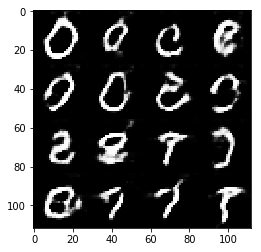

Epoch 1/2... Discriminator Loss: 1.3034... Generator Loss: 0.7095
Epoch 1/2... Discriminator Loss: 1.3647... Generator Loss: 0.6343
Epoch 1/2... Discriminator Loss: 1.2627... Generator Loss: 0.7360
Epoch 1/2... Discriminator Loss: 1.2822... Generator Loss: 0.7070
Epoch 1/2... Discriminator Loss: 1.3872... Generator Loss: 0.6502
Epoch 1/2... Discriminator Loss: 1.3546... Generator Loss: 0.6796
Epoch 1/2... Discriminator Loss: 1.3457... Generator Loss: 0.7091
Epoch 1/2... Discriminator Loss: 1.2991... Generator Loss: 0.7087
Epoch 1/2... Discriminator Loss: 1.3286... Generator Loss: 0.7099
Epoch 1/2... Discriminator Loss: 1.3574... Generator Loss: 0.6730


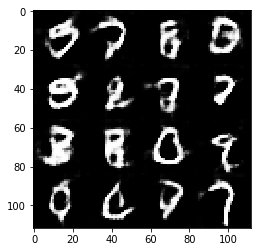

Epoch 1/2... Discriminator Loss: 1.3022... Generator Loss: 0.7025
Epoch 1/2... Discriminator Loss: 1.3682... Generator Loss: 0.6812
Epoch 1/2... Discriminator Loss: 1.3414... Generator Loss: 0.6878
Epoch 1/2... Discriminator Loss: 1.3594... Generator Loss: 0.6959
Epoch 1/2... Discriminator Loss: 1.3276... Generator Loss: 0.6876
Epoch 1/2... Discriminator Loss: 1.2591... Generator Loss: 0.7214
Epoch 1/2... Discriminator Loss: 1.3925... Generator Loss: 0.6726
Epoch 1/2... Discriminator Loss: 1.3146... Generator Loss: 0.7049
Epoch 1/2... Discriminator Loss: 1.3358... Generator Loss: 0.6817
Epoch 1/2... Discriminator Loss: 1.3008... Generator Loss: 0.7009


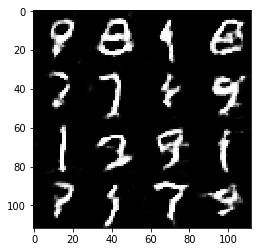

Epoch 1/2... Discriminator Loss: 1.4075... Generator Loss: 0.6727
Epoch 1/2... Discriminator Loss: 1.2976... Generator Loss: 0.7420
Epoch 1/2... Discriminator Loss: 1.3081... Generator Loss: 0.7049
Epoch 1/2... Discriminator Loss: 1.3870... Generator Loss: 0.6422
Epoch 1/2... Discriminator Loss: 1.3332... Generator Loss: 0.6879
Epoch 1/2... Discriminator Loss: 1.3508... Generator Loss: 0.7204
Epoch 1/2... Discriminator Loss: 1.2700... Generator Loss: 0.7132
Epoch 1/2... Discriminator Loss: 1.3020... Generator Loss: 0.7236
Epoch 1/2... Discriminator Loss: 1.3070... Generator Loss: 0.6809
Epoch 1/2... Discriminator Loss: 1.2956... Generator Loss: 0.7392


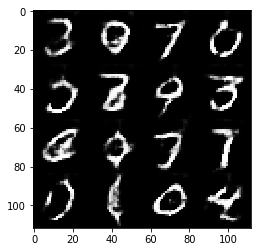

Epoch 1/2... Discriminator Loss: 1.2566... Generator Loss: 0.7090
Epoch 1/2... Discriminator Loss: 1.3296... Generator Loss: 0.7165
Epoch 1/2... Discriminator Loss: 1.3156... Generator Loss: 0.6980
Epoch 1/2... Discriminator Loss: 1.3280... Generator Loss: 0.6766
Epoch 1/2... Discriminator Loss: 1.3055... Generator Loss: 0.7383
Epoch 1/2... Discriminator Loss: 1.3427... Generator Loss: 0.6771
Epoch 1/2... Discriminator Loss: 1.3022... Generator Loss: 0.7072
Epoch 1/2... Discriminator Loss: 1.3550... Generator Loss: 0.6692
Epoch 1/2... Discriminator Loss: 1.3526... Generator Loss: 0.6700
Epoch 1/2... Discriminator Loss: 1.3874... Generator Loss: 0.6500


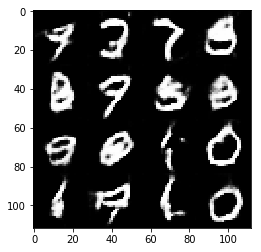

Epoch 1/2... Discriminator Loss: 1.3491... Generator Loss: 0.7019
Epoch 1/2... Discriminator Loss: 1.3948... Generator Loss: 0.6705
Epoch 1/2... Discriminator Loss: 1.3316... Generator Loss: 0.6837
Epoch 1/2... Discriminator Loss: 1.3197... Generator Loss: 0.6759
Epoch 1/2... Discriminator Loss: 1.2488... Generator Loss: 0.7517
Epoch 1/2... Discriminator Loss: 1.3765... Generator Loss: 0.6591
Epoch 1/2... Discriminator Loss: 1.2860... Generator Loss: 0.7196
Epoch 1/2... Discriminator Loss: 1.3507... Generator Loss: 0.6917
Epoch 1/2... Discriminator Loss: 1.3625... Generator Loss: 0.6935
Epoch 1/2... Discriminator Loss: 1.3320... Generator Loss: 0.6870


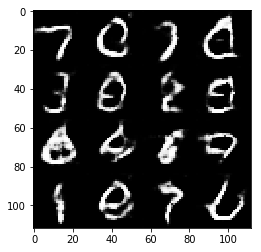

Epoch 1/2... Discriminator Loss: 1.2777... Generator Loss: 0.7387
Epoch 1/2... Discriminator Loss: 1.3703... Generator Loss: 0.6452
Epoch 1/2... Discriminator Loss: 1.3547... Generator Loss: 0.6792
Epoch 1/2... Discriminator Loss: 1.2802... Generator Loss: 0.7119
Epoch 1/2... Discriminator Loss: 1.2970... Generator Loss: 0.7365
Epoch 1/2... Discriminator Loss: 1.3021... Generator Loss: 0.6845
Epoch 1/2... Discriminator Loss: 1.3564... Generator Loss: 0.6857
Epoch 1/2... Discriminator Loss: 1.3308... Generator Loss: 0.7028
Epoch 1/2... Discriminator Loss: 1.3140... Generator Loss: 0.6825
Epoch 1/2... Discriminator Loss: 1.3083... Generator Loss: 0.7075


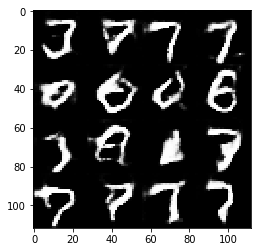

Epoch 1/2... Discriminator Loss: 1.2700... Generator Loss: 0.7004
Epoch 1/2... Discriminator Loss: 1.3455... Generator Loss: 0.6788
Epoch 1/2... Discriminator Loss: 1.3509... Generator Loss: 0.6789
Epoch 1/2... Discriminator Loss: 1.3261... Generator Loss: 0.7152
Epoch 1/2... Discriminator Loss: 1.2792... Generator Loss: 0.6982
Epoch 1/2... Discriminator Loss: 1.2630... Generator Loss: 0.7353
Epoch 1/2... Discriminator Loss: 1.3449... Generator Loss: 0.6867
Epoch 1/2... Discriminator Loss: 1.2627... Generator Loss: 0.6846
Epoch 1/2... Discriminator Loss: 1.3705... Generator Loss: 0.6807
Epoch 1/2... Discriminator Loss: 1.3492... Generator Loss: 0.6728


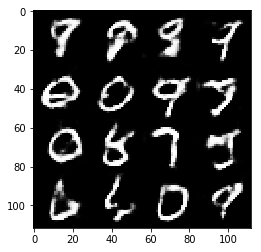

Epoch 1/2... Discriminator Loss: 1.3049... Generator Loss: 0.7169
Epoch 1/2... Discriminator Loss: 1.2918... Generator Loss: 0.7564
Epoch 1/2... Discriminator Loss: 1.3151... Generator Loss: 0.6907
Epoch 1/2... Discriminator Loss: 1.3278... Generator Loss: 0.6683
Epoch 1/2... Discriminator Loss: 1.3189... Generator Loss: 0.7097
Epoch 1/2... Discriminator Loss: 1.3407... Generator Loss: 0.6829
Epoch 1/2... Discriminator Loss: 1.2687... Generator Loss: 0.7240
Epoch 1/2... Discriminator Loss: 1.3096... Generator Loss: 0.6968
Epoch 1/2... Discriminator Loss: 1.3595... Generator Loss: 0.6781
Epoch 1/2... Discriminator Loss: 1.3331... Generator Loss: 0.6968


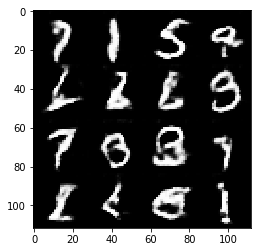

Epoch 1/2... Discriminator Loss: 1.2846... Generator Loss: 0.7047
Epoch 1/2... Discriminator Loss: 1.2847... Generator Loss: 0.6892
Epoch 1/2... Discriminator Loss: 1.3270... Generator Loss: 0.7088
Epoch 1/2... Discriminator Loss: 1.2401... Generator Loss: 0.7319
Epoch 1/2... Discriminator Loss: 1.3259... Generator Loss: 0.7358
Epoch 1/2... Discriminator Loss: 1.3307... Generator Loss: 0.7079
Epoch 1/2... Discriminator Loss: 1.2730... Generator Loss: 0.7269
Epoch 2/2... Discriminator Loss: 1.2978... Generator Loss: 0.7021
Epoch 2/2... Discriminator Loss: 1.3093... Generator Loss: 0.6823
Epoch 2/2... Discriminator Loss: 1.3262... Generator Loss: 0.6857


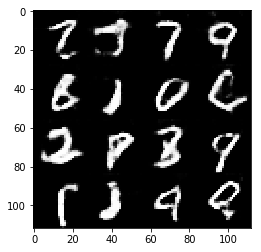

Epoch 2/2... Discriminator Loss: 1.3257... Generator Loss: 0.6586
Epoch 2/2... Discriminator Loss: 1.3177... Generator Loss: 0.7116
Epoch 2/2... Discriminator Loss: 1.2687... Generator Loss: 0.7402
Epoch 2/2... Discriminator Loss: 1.2741... Generator Loss: 0.7151
Epoch 2/2... Discriminator Loss: 1.2389... Generator Loss: 0.7711
Epoch 2/2... Discriminator Loss: 1.2790... Generator Loss: 0.7183
Epoch 2/2... Discriminator Loss: 1.3136... Generator Loss: 0.7151
Epoch 2/2... Discriminator Loss: 1.2614... Generator Loss: 0.7282
Epoch 2/2... Discriminator Loss: 1.2579... Generator Loss: 0.7179
Epoch 2/2... Discriminator Loss: 1.3063... Generator Loss: 0.7087


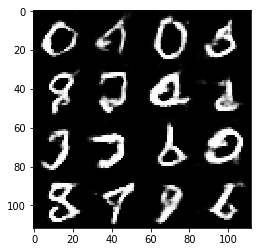

Epoch 2/2... Discriminator Loss: 1.3322... Generator Loss: 0.6794
Epoch 2/2... Discriminator Loss: 1.2056... Generator Loss: 0.7207
Epoch 2/2... Discriminator Loss: 1.2281... Generator Loss: 0.7503
Epoch 2/2... Discriminator Loss: 1.3108... Generator Loss: 0.7271
Epoch 2/2... Discriminator Loss: 1.2993... Generator Loss: 0.7317
Epoch 2/2... Discriminator Loss: 1.2678... Generator Loss: 0.7372
Epoch 2/2... Discriminator Loss: 1.2738... Generator Loss: 0.7463
Epoch 2/2... Discriminator Loss: 1.2791... Generator Loss: 0.7436
Epoch 2/2... Discriminator Loss: 1.3444... Generator Loss: 0.6632
Epoch 2/2... Discriminator Loss: 1.3404... Generator Loss: 0.7128


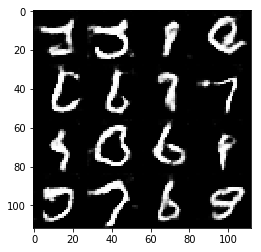

Epoch 2/2... Discriminator Loss: 1.2414... Generator Loss: 0.7319
Epoch 2/2... Discriminator Loss: 1.3316... Generator Loss: 0.7318
Epoch 2/2... Discriminator Loss: 1.2694... Generator Loss: 0.7287
Epoch 2/2... Discriminator Loss: 1.2502... Generator Loss: 0.7202
Epoch 2/2... Discriminator Loss: 1.2299... Generator Loss: 0.7470
Epoch 2/2... Discriminator Loss: 1.2486... Generator Loss: 0.7297
Epoch 2/2... Discriminator Loss: 1.2863... Generator Loss: 0.6999
Epoch 2/2... Discriminator Loss: 1.2751... Generator Loss: 0.7185
Epoch 2/2... Discriminator Loss: 1.2392... Generator Loss: 0.7183
Epoch 2/2... Discriminator Loss: 1.2980... Generator Loss: 0.7271


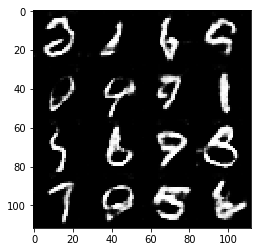

Epoch 2/2... Discriminator Loss: 1.3082... Generator Loss: 0.6929
Epoch 2/2... Discriminator Loss: 1.2453... Generator Loss: 0.7242
Epoch 2/2... Discriminator Loss: 1.2432... Generator Loss: 0.7450
Epoch 2/2... Discriminator Loss: 1.2555... Generator Loss: 0.6955
Epoch 2/2... Discriminator Loss: 1.2650... Generator Loss: 0.7462
Epoch 2/2... Discriminator Loss: 1.2493... Generator Loss: 0.7171
Epoch 2/2... Discriminator Loss: 1.2264... Generator Loss: 0.7951
Epoch 2/2... Discriminator Loss: 1.2302... Generator Loss: 0.7188
Epoch 2/2... Discriminator Loss: 1.2498... Generator Loss: 0.7344
Epoch 2/2... Discriminator Loss: 1.2447... Generator Loss: 0.6849


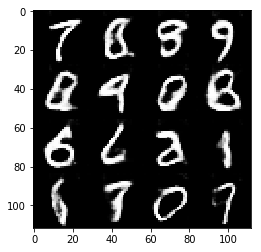

Epoch 2/2... Discriminator Loss: 1.2301... Generator Loss: 0.7836
Epoch 2/2... Discriminator Loss: 1.3000... Generator Loss: 0.7522
Epoch 2/2... Discriminator Loss: 1.3490... Generator Loss: 0.6533
Epoch 2/2... Discriminator Loss: 1.2293... Generator Loss: 0.7440
Epoch 2/2... Discriminator Loss: 1.2536... Generator Loss: 0.6973
Epoch 2/2... Discriminator Loss: 1.1908... Generator Loss: 0.7225
Epoch 2/2... Discriminator Loss: 1.2574... Generator Loss: 0.7486
Epoch 2/2... Discriminator Loss: 1.2644... Generator Loss: 0.6902
Epoch 2/2... Discriminator Loss: 1.2794... Generator Loss: 0.6952
Epoch 2/2... Discriminator Loss: 1.2290... Generator Loss: 0.7566


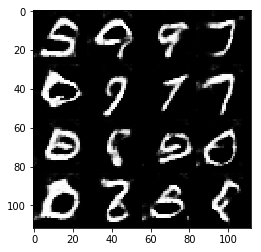

Epoch 2/2... Discriminator Loss: 1.3190... Generator Loss: 0.6863
Epoch 2/2... Discriminator Loss: 1.2491... Generator Loss: 0.7448
Epoch 2/2... Discriminator Loss: 1.2420... Generator Loss: 0.7580
Epoch 2/2... Discriminator Loss: 1.2507... Generator Loss: 0.7277
Epoch 2/2... Discriminator Loss: 1.3100... Generator Loss: 0.7383
Epoch 2/2... Discriminator Loss: 1.2650... Generator Loss: 0.7390
Epoch 2/2... Discriminator Loss: 1.2109... Generator Loss: 0.7891
Epoch 2/2... Discriminator Loss: 1.3153... Generator Loss: 0.7194
Epoch 2/2... Discriminator Loss: 1.2078... Generator Loss: 0.7461
Epoch 2/2... Discriminator Loss: 1.3003... Generator Loss: 0.6987


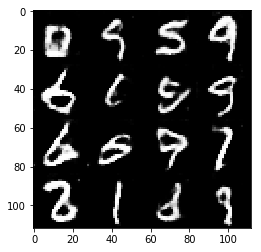

Epoch 2/2... Discriminator Loss: 1.2779... Generator Loss: 0.6934
Epoch 2/2... Discriminator Loss: 1.2238... Generator Loss: 0.7507
Epoch 2/2... Discriminator Loss: 1.2177... Generator Loss: 0.7405
Epoch 2/2... Discriminator Loss: 1.2035... Generator Loss: 0.7416
Epoch 2/2... Discriminator Loss: 1.2836... Generator Loss: 0.8041
Epoch 2/2... Discriminator Loss: 1.2006... Generator Loss: 0.7576
Epoch 2/2... Discriminator Loss: 1.2674... Generator Loss: 0.7069
Epoch 2/2... Discriminator Loss: 1.3287... Generator Loss: 0.6383
Epoch 2/2... Discriminator Loss: 1.2680... Generator Loss: 0.7123
Epoch 2/2... Discriminator Loss: 1.3055... Generator Loss: 0.7235


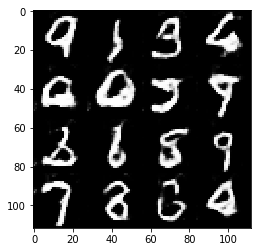

Epoch 2/2... Discriminator Loss: 1.2685... Generator Loss: 0.7694
Epoch 2/2... Discriminator Loss: 1.2265... Generator Loss: 0.7708
Epoch 2/2... Discriminator Loss: 1.2670... Generator Loss: 0.7529
Epoch 2/2... Discriminator Loss: 1.1764... Generator Loss: 0.7646
Epoch 2/2... Discriminator Loss: 1.2105... Generator Loss: 0.7564
Epoch 2/2... Discriminator Loss: 1.2552... Generator Loss: 0.7307
Epoch 2/2... Discriminator Loss: 1.1896... Generator Loss: 0.7324
Epoch 2/2... Discriminator Loss: 1.2259... Generator Loss: 0.7474
Epoch 2/2... Discriminator Loss: 1.2526... Generator Loss: 0.7167
Epoch 2/2... Discriminator Loss: 1.2211... Generator Loss: 0.6973


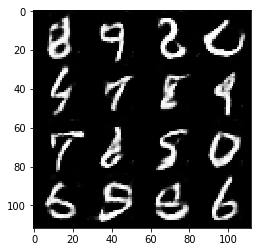

Epoch 2/2... Discriminator Loss: 1.2296... Generator Loss: 0.7594
Epoch 2/2... Discriminator Loss: 1.2405... Generator Loss: 0.7648
Epoch 2/2... Discriminator Loss: 1.2228... Generator Loss: 0.7322
Epoch 2/2... Discriminator Loss: 1.2896... Generator Loss: 0.7146
Epoch 2/2... Discriminator Loss: 1.2878... Generator Loss: 0.6821
Epoch 2/2... Discriminator Loss: 1.2829... Generator Loss: 0.6996
Epoch 2/2... Discriminator Loss: 1.2703... Generator Loss: 0.7286
Epoch 2/2... Discriminator Loss: 1.2841... Generator Loss: 0.7218
Epoch 2/2... Discriminator Loss: 1.2270... Generator Loss: 0.8256
Epoch 2/2... Discriminator Loss: 1.2055... Generator Loss: 0.7740


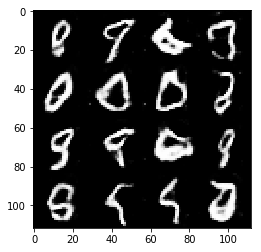

Epoch 2/2... Discriminator Loss: 1.3185... Generator Loss: 0.7100
Epoch 2/2... Discriminator Loss: 1.1615... Generator Loss: 0.7898
Epoch 2/2... Discriminator Loss: 1.2150... Generator Loss: 0.7191
Epoch 2/2... Discriminator Loss: 1.1966... Generator Loss: 0.7425
Epoch 2/2... Discriminator Loss: 1.2033... Generator Loss: 0.8602
Epoch 2/2... Discriminator Loss: 1.2278... Generator Loss: 0.7777
Epoch 2/2... Discriminator Loss: 1.2017... Generator Loss: 0.7493
Epoch 2/2... Discriminator Loss: 1.2509... Generator Loss: 0.6948
Epoch 2/2... Discriminator Loss: 1.2208... Generator Loss: 0.6945
Epoch 2/2... Discriminator Loss: 1.2654... Generator Loss: 0.7662


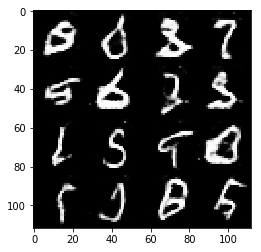

Epoch 2/2... Discriminator Loss: 1.3071... Generator Loss: 0.6737
Epoch 2/2... Discriminator Loss: 1.1683... Generator Loss: 0.8836
Epoch 2/2... Discriminator Loss: 1.2595... Generator Loss: 0.7909
Epoch 2/2... Discriminator Loss: 1.2618... Generator Loss: 0.7102
Epoch 2/2... Discriminator Loss: 1.2289... Generator Loss: 0.6929
Epoch 2/2... Discriminator Loss: 1.2239... Generator Loss: 0.8046
Epoch 2/2... Discriminator Loss: 1.1595... Generator Loss: 0.7533
Epoch 2/2... Discriminator Loss: 1.2636... Generator Loss: 0.6967
Epoch 2/2... Discriminator Loss: 1.1662... Generator Loss: 0.7610
Epoch 2/2... Discriminator Loss: 1.1818... Generator Loss: 0.8093


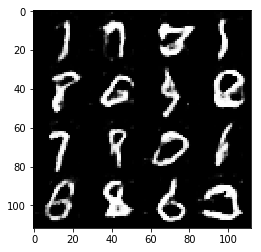

Epoch 2/2... Discriminator Loss: 1.2341... Generator Loss: 0.7154
Epoch 2/2... Discriminator Loss: 1.1927... Generator Loss: 0.7275
Epoch 2/2... Discriminator Loss: 1.2073... Generator Loss: 0.7480
Epoch 2/2... Discriminator Loss: 1.2140... Generator Loss: 0.7440
Epoch 2/2... Discriminator Loss: 1.1996... Generator Loss: 0.8176
Epoch 2/2... Discriminator Loss: 1.2319... Generator Loss: 0.8340
Epoch 2/2... Discriminator Loss: 1.2461... Generator Loss: 0.7228
Epoch 2/2... Discriminator Loss: 1.3008... Generator Loss: 0.6976
Epoch 2/2... Discriminator Loss: 1.2455... Generator Loss: 0.9035
Epoch 2/2... Discriminator Loss: 1.2076... Generator Loss: 0.7643


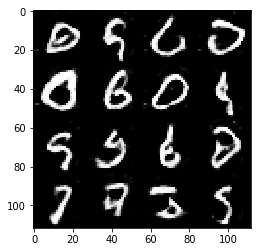

Epoch 2/2... Discriminator Loss: 1.1816... Generator Loss: 0.8222
Epoch 2/2... Discriminator Loss: 1.1996... Generator Loss: 0.7124
Epoch 2/2... Discriminator Loss: 1.1713... Generator Loss: 0.8013
Epoch 2/2... Discriminator Loss: 1.1942... Generator Loss: 0.7272
Epoch 2/2... Discriminator Loss: 1.1752... Generator Loss: 0.8041
Epoch 2/2... Discriminator Loss: 1.1920... Generator Loss: 0.7846
Epoch 2/2... Discriminator Loss: 1.1827... Generator Loss: 0.7587
Epoch 2/2... Discriminator Loss: 1.2145... Generator Loss: 0.7702
Epoch 2/2... Discriminator Loss: 1.2500... Generator Loss: 0.7004
Epoch 2/2... Discriminator Loss: 1.2055... Generator Loss: 0.8077


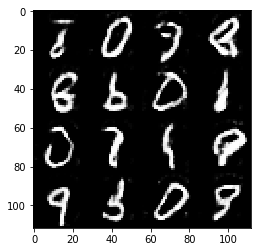

Epoch 2/2... Discriminator Loss: 1.2323... Generator Loss: 0.7212
Epoch 2/2... Discriminator Loss: 1.2838... Generator Loss: 0.7384
Epoch 2/2... Discriminator Loss: 1.1580... Generator Loss: 0.7361
Epoch 2/2... Discriminator Loss: 1.2901... Generator Loss: 0.6859
Epoch 2/2... Discriminator Loss: 1.1401... Generator Loss: 0.9323
Epoch 2/2... Discriminator Loss: 1.1782... Generator Loss: 0.7717
Epoch 2/2... Discriminator Loss: 1.2025... Generator Loss: 0.8296
Epoch 2/2... Discriminator Loss: 1.1747... Generator Loss: 0.8004
Epoch 2/2... Discriminator Loss: 1.2731... Generator Loss: 0.8412
Epoch 2/2... Discriminator Loss: 1.2171... Generator Loss: 0.7127


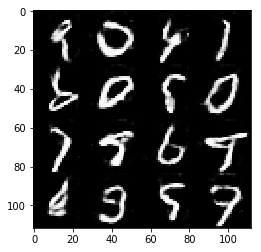

Epoch 2/2... Discriminator Loss: 1.1961... Generator Loss: 0.7801
Epoch 2/2... Discriminator Loss: 1.1612... Generator Loss: 0.7538
Epoch 2/2... Discriminator Loss: 1.2041... Generator Loss: 0.7913
Epoch 2/2... Discriminator Loss: 1.1837... Generator Loss: 0.7386
Epoch 2/2... Discriminator Loss: 1.1897... Generator Loss: 0.7856
Epoch 2/2... Discriminator Loss: 1.1551... Generator Loss: 0.8311
Epoch 2/2... Discriminator Loss: 1.2033... Generator Loss: 0.7281
Epoch 2/2... Discriminator Loss: 1.1654... Generator Loss: 0.7448
Epoch 2/2... Discriminator Loss: 1.1518... Generator Loss: 0.7989
Epoch 2/2... Discriminator Loss: 1.1863... Generator Loss: 0.6808


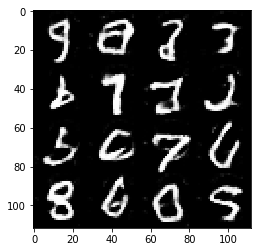

Epoch 2/2... Discriminator Loss: 1.1682... Generator Loss: 0.7347
Epoch 2/2... Discriminator Loss: 1.2569... Generator Loss: 0.9087
Epoch 2/2... Discriminator Loss: 1.0857... Generator Loss: 0.7896
Epoch 2/2... Discriminator Loss: 1.2260... Generator Loss: 0.8484
Epoch 2/2... Discriminator Loss: 1.2645... Generator Loss: 0.7174
Epoch 2/2... Discriminator Loss: 1.1501... Generator Loss: 0.8187
Epoch 2/2... Discriminator Loss: 1.1581... Generator Loss: 0.7795
Epoch 2/2... Discriminator Loss: 1.1576... Generator Loss: 0.7532
Epoch 2/2... Discriminator Loss: 1.2150... Generator Loss: 0.9144
Epoch 2/2... Discriminator Loss: 1.2047... Generator Loss: 0.7522


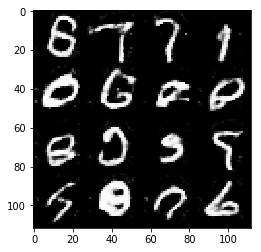

Epoch 2/2... Discriminator Loss: 1.2483... Generator Loss: 0.7121
Epoch 2/2... Discriminator Loss: 1.1716... Generator Loss: 0.8428
Epoch 2/2... Discriminator Loss: 1.2744... Generator Loss: 0.7589
Epoch 2/2... Discriminator Loss: 1.1144... Generator Loss: 0.7986
Epoch 2/2... Discriminator Loss: 1.2337... Generator Loss: 0.7180
Epoch 2/2... Discriminator Loss: 1.2186... Generator Loss: 0.7014
Epoch 2/2... Discriminator Loss: 1.2074... Generator Loss: 0.7123
Epoch 2/2... Discriminator Loss: 1.2291... Generator Loss: 0.7974
Epoch 2/2... Discriminator Loss: 1.2007... Generator Loss: 0.7823
Epoch 2/2... Discriminator Loss: 1.1765... Generator Loss: 0.7834


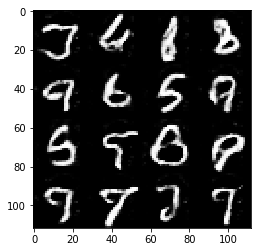

Epoch 2/2... Discriminator Loss: 1.2226... Generator Loss: 0.7418
Epoch 2/2... Discriminator Loss: 1.2292... Generator Loss: 0.7744
Epoch 2/2... Discriminator Loss: 1.1646... Generator Loss: 0.8111
Epoch 2/2... Discriminator Loss: 1.2116... Generator Loss: 0.7271
Epoch 2/2... Discriminator Loss: 1.2455... Generator Loss: 0.7303
Epoch 2/2... Discriminator Loss: 1.2283... Generator Loss: 0.7469
Epoch 2/2... Discriminator Loss: 1.1688... Generator Loss: 0.7995
Epoch 2/2... Discriminator Loss: 1.2291... Generator Loss: 0.7103
Epoch 2/2... Discriminator Loss: 1.1547... Generator Loss: 0.7304
Epoch 2/2... Discriminator Loss: 1.2327... Generator Loss: 0.6936


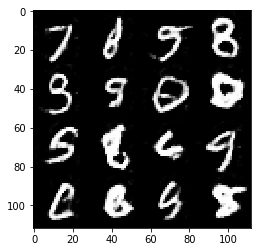

Epoch 2/2... Discriminator Loss: 1.1864... Generator Loss: 0.7626
Epoch 2/2... Discriminator Loss: 1.2262... Generator Loss: 0.8152
Epoch 2/2... Discriminator Loss: 1.1910... Generator Loss: 0.7348
Epoch 2/2... Discriminator Loss: 1.2382... Generator Loss: 0.7723
Epoch 2/2... Discriminator Loss: 1.1718... Generator Loss: 0.7400


In [21]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Tensor("Placeholder_2:0", dtype=float32)
Epoch 1/1... Discriminator Loss: 2.1595... Generator Loss: 0.2343
Epoch 1/1... Discriminator Loss: 1.8134... Generator Loss: 0.3734
Epoch 1/1... Discriminator Loss: 1.6256... Generator Loss: 0.4345
Epoch 1/1... Discriminator Loss: 1.6961... Generator Loss: 0.4171
Epoch 1/1... Discriminator Loss: 1.5420... Generator Loss: 0.4711
Epoch 1/1... Discriminator Loss: 1.4684... Generator Loss: 0.5361
Epoch 1/1... Discriminator Loss: 1.4105... Generator Loss: 0.5594
Epoch 1/1... Discriminator Loss: 1.4154... Generator Loss: 0.5428
Epoch 1/1... Discriminator Loss: 1.3741... Generator Loss: 0.6274
Epoch 1/1... Discriminator Loss: 1.2098... Generator Loss: 0.6822


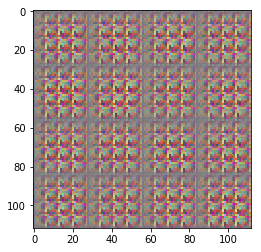

Epoch 1/1... Discriminator Loss: 1.1612... Generator Loss: 0.6959
Epoch 1/1... Discriminator Loss: 1.0526... Generator Loss: 0.7902
Epoch 1/1... Discriminator Loss: 1.1429... Generator Loss: 0.7358
Epoch 1/1... Discriminator Loss: 1.1558... Generator Loss: 0.7384
Epoch 1/1... Discriminator Loss: 0.9486... Generator Loss: 0.8310
Epoch 1/1... Discriminator Loss: 0.9040... Generator Loss: 0.8824
Epoch 1/1... Discriminator Loss: 0.9973... Generator Loss: 0.8146
Epoch 1/1... Discriminator Loss: 1.2498... Generator Loss: 0.7656
Epoch 1/1... Discriminator Loss: 1.2874... Generator Loss: 0.7547
Epoch 1/1... Discriminator Loss: 1.1895... Generator Loss: 0.7935


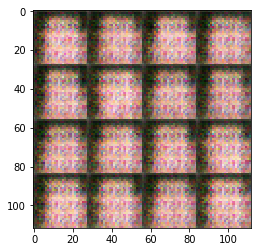

Epoch 1/1... Discriminator Loss: 1.3028... Generator Loss: 0.6951
Epoch 1/1... Discriminator Loss: 1.2967... Generator Loss: 0.6943
Epoch 1/1... Discriminator Loss: 1.3605... Generator Loss: 0.6728
Epoch 1/1... Discriminator Loss: 1.2821... Generator Loss: 0.6757
Epoch 1/1... Discriminator Loss: 1.3394... Generator Loss: 0.6511
Epoch 1/1... Discriminator Loss: 1.3512... Generator Loss: 0.6680
Epoch 1/1... Discriminator Loss: 1.2613... Generator Loss: 0.7494
Epoch 1/1... Discriminator Loss: 1.3256... Generator Loss: 0.6560
Epoch 1/1... Discriminator Loss: 1.4729... Generator Loss: 0.6347
Epoch 1/1... Discriminator Loss: 1.4381... Generator Loss: 0.6293


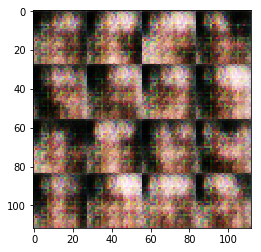

Epoch 1/1... Discriminator Loss: 1.4482... Generator Loss: 0.6541
Epoch 1/1... Discriminator Loss: 1.4546... Generator Loss: 0.6092
Epoch 1/1... Discriminator Loss: 1.3708... Generator Loss: 0.6833
Epoch 1/1... Discriminator Loss: 1.3480... Generator Loss: 0.6903
Epoch 1/1... Discriminator Loss: 1.4843... Generator Loss: 0.6501
Epoch 1/1... Discriminator Loss: 1.3610... Generator Loss: 0.6711
Epoch 1/1... Discriminator Loss: 1.3681... Generator Loss: 0.6950
Epoch 1/1... Discriminator Loss: 1.2943... Generator Loss: 0.6925
Epoch 1/1... Discriminator Loss: 1.3412... Generator Loss: 0.6905
Epoch 1/1... Discriminator Loss: 1.2017... Generator Loss: 0.7739


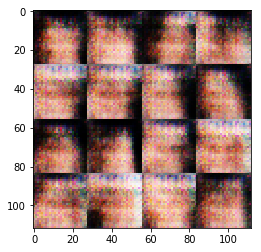

Epoch 1/1... Discriminator Loss: 1.3522... Generator Loss: 0.6947
Epoch 1/1... Discriminator Loss: 1.4105... Generator Loss: 0.6383
Epoch 1/1... Discriminator Loss: 1.4075... Generator Loss: 0.6373
Epoch 1/1... Discriminator Loss: 1.3869... Generator Loss: 0.6626
Epoch 1/1... Discriminator Loss: 1.3377... Generator Loss: 0.6662
Epoch 1/1... Discriminator Loss: 1.3798... Generator Loss: 0.6378
Epoch 1/1... Discriminator Loss: 1.4246... Generator Loss: 0.6359
Epoch 1/1... Discriminator Loss: 1.4531... Generator Loss: 0.6176
Epoch 1/1... Discriminator Loss: 1.4542... Generator Loss: 0.6158
Epoch 1/1... Discriminator Loss: 1.4365... Generator Loss: 0.6206


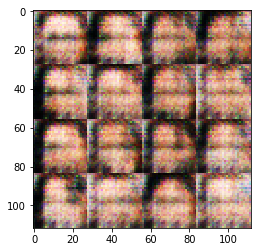

Epoch 1/1... Discriminator Loss: 1.5374... Generator Loss: 0.6144
Epoch 1/1... Discriminator Loss: 1.3925... Generator Loss: 0.6467
Epoch 1/1... Discriminator Loss: 1.3861... Generator Loss: 0.6787
Epoch 1/1... Discriminator Loss: 1.4071... Generator Loss: 0.6431
Epoch 1/1... Discriminator Loss: 1.4031... Generator Loss: 0.6649
Epoch 1/1... Discriminator Loss: 1.4008... Generator Loss: 0.6379
Epoch 1/1... Discriminator Loss: 1.3736... Generator Loss: 0.6928
Epoch 1/1... Discriminator Loss: 1.4413... Generator Loss: 0.6409
Epoch 1/1... Discriminator Loss: 1.3985... Generator Loss: 0.6658
Epoch 1/1... Discriminator Loss: 1.3248... Generator Loss: 0.6652


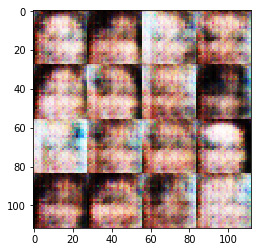

Epoch 1/1... Discriminator Loss: 1.4331... Generator Loss: 0.6759
Epoch 1/1... Discriminator Loss: 1.4205... Generator Loss: 0.6623
Epoch 1/1... Discriminator Loss: 1.3614... Generator Loss: 0.6773
Epoch 1/1... Discriminator Loss: 1.4297... Generator Loss: 0.6392
Epoch 1/1... Discriminator Loss: 1.3928... Generator Loss: 0.6489
Epoch 1/1... Discriminator Loss: 1.3904... Generator Loss: 0.6595
Epoch 1/1... Discriminator Loss: 1.3564... Generator Loss: 0.7146
Epoch 1/1... Discriminator Loss: 1.3819... Generator Loss: 0.6629
Epoch 1/1... Discriminator Loss: 1.4276... Generator Loss: 0.6477
Epoch 1/1... Discriminator Loss: 1.4031... Generator Loss: 0.6787


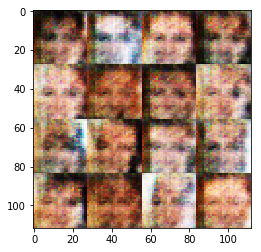

Epoch 1/1... Discriminator Loss: 1.4508... Generator Loss: 0.6686
Epoch 1/1... Discriminator Loss: 1.3492... Generator Loss: 0.6901
Epoch 1/1... Discriminator Loss: 1.4154... Generator Loss: 0.6342
Epoch 1/1... Discriminator Loss: 1.3830... Generator Loss: 0.6658
Epoch 1/1... Discriminator Loss: 1.3611... Generator Loss: 0.6831
Epoch 1/1... Discriminator Loss: 1.4212... Generator Loss: 0.6924
Epoch 1/1... Discriminator Loss: 1.3445... Generator Loss: 0.6675
Epoch 1/1... Discriminator Loss: 1.4347... Generator Loss: 0.6318
Epoch 1/1... Discriminator Loss: 1.3606... Generator Loss: 0.7001
Epoch 1/1... Discriminator Loss: 1.4535... Generator Loss: 0.6658


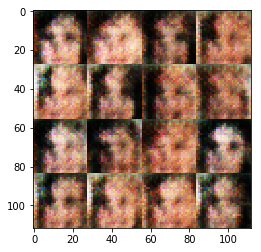

Epoch 1/1... Discriminator Loss: 1.3753... Generator Loss: 0.6758
Epoch 1/1... Discriminator Loss: 1.3704... Generator Loss: 0.6974
Epoch 1/1... Discriminator Loss: 1.3735... Generator Loss: 0.6680
Epoch 1/1... Discriminator Loss: 1.4164... Generator Loss: 0.6793
Epoch 1/1... Discriminator Loss: 1.4024... Generator Loss: 0.6593
Epoch 1/1... Discriminator Loss: 1.4344... Generator Loss: 0.6484
Epoch 1/1... Discriminator Loss: 1.4183... Generator Loss: 0.6528
Epoch 1/1... Discriminator Loss: 1.3980... Generator Loss: 0.6807
Epoch 1/1... Discriminator Loss: 1.3595... Generator Loss: 0.6842
Epoch 1/1... Discriminator Loss: 1.3643... Generator Loss: 0.6929


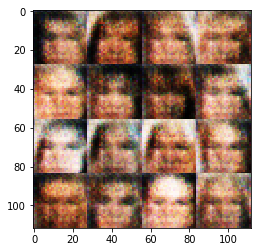

Epoch 1/1... Discriminator Loss: 1.4004... Generator Loss: 0.6730
Epoch 1/1... Discriminator Loss: 1.4980... Generator Loss: 0.6167
Epoch 1/1... Discriminator Loss: 1.4462... Generator Loss: 0.6264
Epoch 1/1... Discriminator Loss: 1.4382... Generator Loss: 0.6231
Epoch 1/1... Discriminator Loss: 1.3907... Generator Loss: 0.6828
Epoch 1/1... Discriminator Loss: 1.3887... Generator Loss: 0.6624
Epoch 1/1... Discriminator Loss: 1.4068... Generator Loss: 0.6491
Epoch 1/1... Discriminator Loss: 1.4089... Generator Loss: 0.6543
Epoch 1/1... Discriminator Loss: 1.4240... Generator Loss: 0.6656
Epoch 1/1... Discriminator Loss: 1.4746... Generator Loss: 0.6301


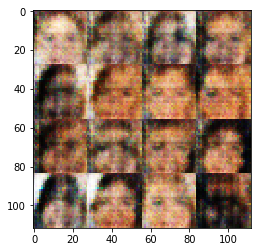

Epoch 1/1... Discriminator Loss: 1.4108... Generator Loss: 0.6479
Epoch 1/1... Discriminator Loss: 1.4212... Generator Loss: 0.6762
Epoch 1/1... Discriminator Loss: 1.4330... Generator Loss: 0.6450
Epoch 1/1... Discriminator Loss: 1.3770... Generator Loss: 0.6688
Epoch 1/1... Discriminator Loss: 1.3921... Generator Loss: 0.7134
Epoch 1/1... Discriminator Loss: 1.3879... Generator Loss: 0.6563
Epoch 1/1... Discriminator Loss: 1.4277... Generator Loss: 0.6680
Epoch 1/1... Discriminator Loss: 1.4839... Generator Loss: 0.6041
Epoch 1/1... Discriminator Loss: 1.3778... Generator Loss: 0.6681
Epoch 1/1... Discriminator Loss: 1.4282... Generator Loss: 0.6657


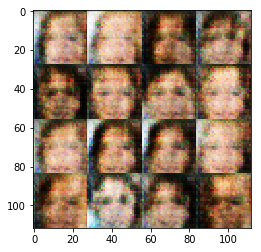

Epoch 1/1... Discriminator Loss: 1.4067... Generator Loss: 0.6691
Epoch 1/1... Discriminator Loss: 1.4140... Generator Loss: 0.6455
Epoch 1/1... Discriminator Loss: 1.4342... Generator Loss: 0.6591
Epoch 1/1... Discriminator Loss: 1.4895... Generator Loss: 0.6418
Epoch 1/1... Discriminator Loss: 1.5326... Generator Loss: 0.6347
Epoch 1/1... Discriminator Loss: 1.3986... Generator Loss: 0.6623
Epoch 1/1... Discriminator Loss: 1.4014... Generator Loss: 0.6560
Epoch 1/1... Discriminator Loss: 1.3269... Generator Loss: 0.6952
Epoch 1/1... Discriminator Loss: 1.4304... Generator Loss: 0.6376
Epoch 1/1... Discriminator Loss: 1.3636... Generator Loss: 0.6691


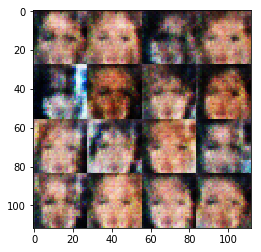

Epoch 1/1... Discriminator Loss: 1.4177... Generator Loss: 0.6271
Epoch 1/1... Discriminator Loss: 1.4004... Generator Loss: 0.6974
Epoch 1/1... Discriminator Loss: 1.4575... Generator Loss: 0.6410
Epoch 1/1... Discriminator Loss: 1.3782... Generator Loss: 0.6514
Epoch 1/1... Discriminator Loss: 1.3609... Generator Loss: 0.6833
Epoch 1/1... Discriminator Loss: 1.3997... Generator Loss: 0.6753
Epoch 1/1... Discriminator Loss: 1.4138... Generator Loss: 0.6678
Epoch 1/1... Discriminator Loss: 1.5073... Generator Loss: 0.6328
Epoch 1/1... Discriminator Loss: 1.4017... Generator Loss: 0.6623
Epoch 1/1... Discriminator Loss: 1.3929... Generator Loss: 0.6871


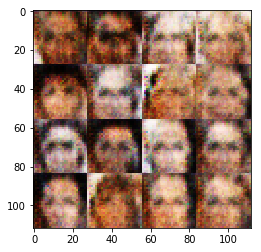

Epoch 1/1... Discriminator Loss: 1.3382... Generator Loss: 0.6734
Epoch 1/1... Discriminator Loss: 1.3985... Generator Loss: 0.6834
Epoch 1/1... Discriminator Loss: 1.3563... Generator Loss: 0.7012
Epoch 1/1... Discriminator Loss: 1.4240... Generator Loss: 0.6743
Epoch 1/1... Discriminator Loss: 1.3662... Generator Loss: 0.6778
Epoch 1/1... Discriminator Loss: 1.3831... Generator Loss: 0.6644
Epoch 1/1... Discriminator Loss: 1.3857... Generator Loss: 0.6815
Epoch 1/1... Discriminator Loss: 1.4895... Generator Loss: 0.6291
Epoch 1/1... Discriminator Loss: 1.4601... Generator Loss: 0.6311
Epoch 1/1... Discriminator Loss: 1.4176... Generator Loss: 0.6511


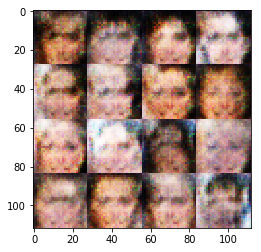

Epoch 1/1... Discriminator Loss: 1.4151... Generator Loss: 0.6697
Epoch 1/1... Discriminator Loss: 1.3885... Generator Loss: 0.6662
Epoch 1/1... Discriminator Loss: 1.4439... Generator Loss: 0.6438
Epoch 1/1... Discriminator Loss: 1.5030... Generator Loss: 0.6235
Epoch 1/1... Discriminator Loss: 1.4251... Generator Loss: 0.6437
Epoch 1/1... Discriminator Loss: 1.3570... Generator Loss: 0.6606
Epoch 1/1... Discriminator Loss: 1.3840... Generator Loss: 0.6659
Epoch 1/1... Discriminator Loss: 1.4246... Generator Loss: 0.6527
Epoch 1/1... Discriminator Loss: 1.4441... Generator Loss: 0.6242
Epoch 1/1... Discriminator Loss: 1.4156... Generator Loss: 0.6325


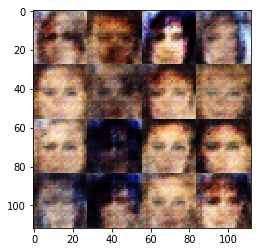

Epoch 1/1... Discriminator Loss: 1.4309... Generator Loss: 0.6590
Epoch 1/1... Discriminator Loss: 1.4120... Generator Loss: 0.6550
Epoch 1/1... Discriminator Loss: 1.4018... Generator Loss: 0.6693
Epoch 1/1... Discriminator Loss: 1.3756... Generator Loss: 0.6909
Epoch 1/1... Discriminator Loss: 1.4616... Generator Loss: 0.6261
Epoch 1/1... Discriminator Loss: 1.4403... Generator Loss: 0.6232
Epoch 1/1... Discriminator Loss: 1.3536... Generator Loss: 0.6661
Epoch 1/1... Discriminator Loss: 1.3895... Generator Loss: 0.6795
Epoch 1/1... Discriminator Loss: 1.3722... Generator Loss: 0.6467
Epoch 1/1... Discriminator Loss: 1.3710... Generator Loss: 0.6914


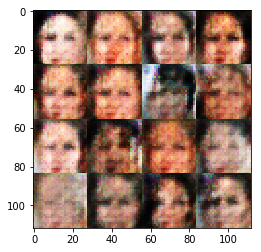

Epoch 1/1... Discriminator Loss: 1.3763... Generator Loss: 0.6574
Epoch 1/1... Discriminator Loss: 1.3667... Generator Loss: 0.6773
Epoch 1/1... Discriminator Loss: 1.4321... Generator Loss: 0.6846
Epoch 1/1... Discriminator Loss: 1.3361... Generator Loss: 0.6893
Epoch 1/1... Discriminator Loss: 1.3355... Generator Loss: 0.6943
Epoch 1/1... Discriminator Loss: 1.2832... Generator Loss: 0.7087
Epoch 1/1... Discriminator Loss: 1.4553... Generator Loss: 0.6303
Epoch 1/1... Discriminator Loss: 1.3945... Generator Loss: 0.6493
Epoch 1/1... Discriminator Loss: 1.4237... Generator Loss: 0.6500
Epoch 1/1... Discriminator Loss: 1.4097... Generator Loss: 0.6372


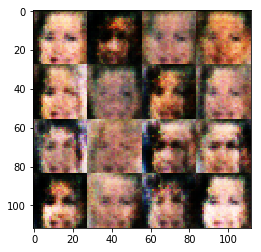

Epoch 1/1... Discriminator Loss: 1.4062... Generator Loss: 0.6652
Epoch 1/1... Discriminator Loss: 1.3689... Generator Loss: 0.6817
Epoch 1/1... Discriminator Loss: 1.4281... Generator Loss: 0.6578
Epoch 1/1... Discriminator Loss: 1.3560... Generator Loss: 0.6920
Epoch 1/1... Discriminator Loss: 1.3639... Generator Loss: 0.6995
Epoch 1/1... Discriminator Loss: 1.3667... Generator Loss: 0.6389
Epoch 1/1... Discriminator Loss: 1.4290... Generator Loss: 0.6504
Epoch 1/1... Discriminator Loss: 1.3594... Generator Loss: 0.6810
Epoch 1/1... Discriminator Loss: 1.4089... Generator Loss: 0.6490
Epoch 1/1... Discriminator Loss: 1.4227... Generator Loss: 0.6677


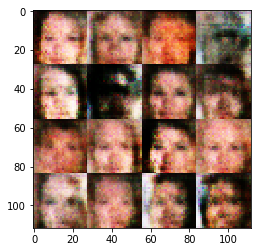

Epoch 1/1... Discriminator Loss: 1.3852... Generator Loss: 0.6633
Epoch 1/1... Discriminator Loss: 1.4182... Generator Loss: 0.6610
Epoch 1/1... Discriminator Loss: 1.3516... Generator Loss: 0.6624
Epoch 1/1... Discriminator Loss: 1.3909... Generator Loss: 0.6659
Epoch 1/1... Discriminator Loss: 1.4488... Generator Loss: 0.6347
Epoch 1/1... Discriminator Loss: 1.4179... Generator Loss: 0.6638
Epoch 1/1... Discriminator Loss: 1.3816... Generator Loss: 0.6652
Epoch 1/1... Discriminator Loss: 1.3549... Generator Loss: 0.7068
Epoch 1/1... Discriminator Loss: 1.3423... Generator Loss: 0.7133
Epoch 1/1... Discriminator Loss: 1.3950... Generator Loss: 0.6686


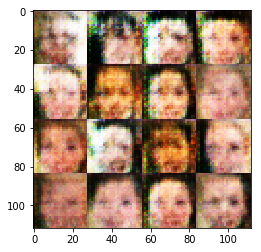

Epoch 1/1... Discriminator Loss: 1.3250... Generator Loss: 0.7045
Epoch 1/1... Discriminator Loss: 1.3838... Generator Loss: 0.6682
Epoch 1/1... Discriminator Loss: 1.3762... Generator Loss: 0.6724
Epoch 1/1... Discriminator Loss: 1.4274... Generator Loss: 0.6689
Epoch 1/1... Discriminator Loss: 1.4478... Generator Loss: 0.6506
Epoch 1/1... Discriminator Loss: 1.3863... Generator Loss: 0.6555
Epoch 1/1... Discriminator Loss: 1.3742... Generator Loss: 0.6780
Epoch 1/1... Discriminator Loss: 1.3910... Generator Loss: 0.6848
Epoch 1/1... Discriminator Loss: 1.4240... Generator Loss: 0.6447
Epoch 1/1... Discriminator Loss: 1.4344... Generator Loss: 0.6429


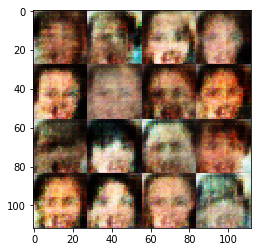

Epoch 1/1... Discriminator Loss: 1.4224... Generator Loss: 0.6765
Epoch 1/1... Discriminator Loss: 1.3850... Generator Loss: 0.6496
Epoch 1/1... Discriminator Loss: 1.3722... Generator Loss: 0.6775
Epoch 1/1... Discriminator Loss: 1.3991... Generator Loss: 0.6536
Epoch 1/1... Discriminator Loss: 1.3788... Generator Loss: 0.6699
Epoch 1/1... Discriminator Loss: 1.3885... Generator Loss: 0.6669
Epoch 1/1... Discriminator Loss: 1.3732... Generator Loss: 0.6784
Epoch 1/1... Discriminator Loss: 1.3804... Generator Loss: 0.6655
Epoch 1/1... Discriminator Loss: 1.4305... Generator Loss: 0.6500
Epoch 1/1... Discriminator Loss: 1.3680... Generator Loss: 0.6270


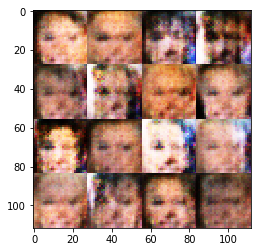

Epoch 1/1... Discriminator Loss: 1.4408... Generator Loss: 0.6493
Epoch 1/1... Discriminator Loss: 1.4289... Generator Loss: 0.6473
Epoch 1/1... Discriminator Loss: 1.4524... Generator Loss: 0.6228
Epoch 1/1... Discriminator Loss: 1.3430... Generator Loss: 0.6815
Epoch 1/1... Discriminator Loss: 1.4208... Generator Loss: 0.6443
Epoch 1/1... Discriminator Loss: 1.4313... Generator Loss: 0.6542
Epoch 1/1... Discriminator Loss: 1.3955... Generator Loss: 0.6701
Epoch 1/1... Discriminator Loss: 1.3943... Generator Loss: 0.6520
Epoch 1/1... Discriminator Loss: 1.4554... Generator Loss: 0.6592
Epoch 1/1... Discriminator Loss: 1.4351... Generator Loss: 0.6537


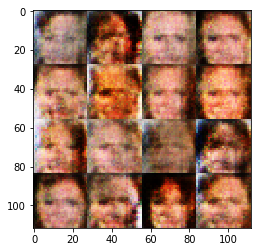

Epoch 1/1... Discriminator Loss: 1.4803... Generator Loss: 0.6559
Epoch 1/1... Discriminator Loss: 1.4273... Generator Loss: 0.6527
Epoch 1/1... Discriminator Loss: 1.3814... Generator Loss: 0.6561
Epoch 1/1... Discriminator Loss: 1.3854... Generator Loss: 0.6732
Epoch 1/1... Discriminator Loss: 1.3678... Generator Loss: 0.6845
Epoch 1/1... Discriminator Loss: 1.3661... Generator Loss: 0.6887
Epoch 1/1... Discriminator Loss: 1.4548... Generator Loss: 0.6650
Epoch 1/1... Discriminator Loss: 1.4316... Generator Loss: 0.6460
Epoch 1/1... Discriminator Loss: 1.4042... Generator Loss: 0.7003
Epoch 1/1... Discriminator Loss: 1.3873... Generator Loss: 0.6603


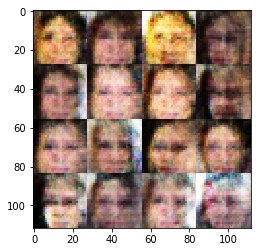

Epoch 1/1... Discriminator Loss: 1.3632... Generator Loss: 0.6662
Epoch 1/1... Discriminator Loss: 1.4291... Generator Loss: 0.6697
Epoch 1/1... Discriminator Loss: 1.4629... Generator Loss: 0.6293
Epoch 1/1... Discriminator Loss: 1.3838... Generator Loss: 0.6821
Epoch 1/1... Discriminator Loss: 1.4474... Generator Loss: 0.6662
Epoch 1/1... Discriminator Loss: 1.4153... Generator Loss: 0.6359
Epoch 1/1... Discriminator Loss: 1.4239... Generator Loss: 0.6760
Epoch 1/1... Discriminator Loss: 1.3757... Generator Loss: 0.6811
Epoch 1/1... Discriminator Loss: 1.3941... Generator Loss: 0.6652
Epoch 1/1... Discriminator Loss: 1.4034... Generator Loss: 0.6669


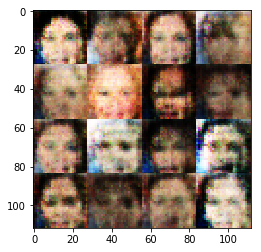

Epoch 1/1... Discriminator Loss: 1.4091... Generator Loss: 0.6834
Epoch 1/1... Discriminator Loss: 1.3944... Generator Loss: 0.6617
Epoch 1/1... Discriminator Loss: 1.4346... Generator Loss: 0.6509
Epoch 1/1... Discriminator Loss: 1.3876... Generator Loss: 0.6745
Epoch 1/1... Discriminator Loss: 1.3854... Generator Loss: 0.6712
Epoch 1/1... Discriminator Loss: 1.4408... Generator Loss: 0.6459
Epoch 1/1... Discriminator Loss: 1.3714... Generator Loss: 0.6872
Epoch 1/1... Discriminator Loss: 1.4171... Generator Loss: 0.6307
Epoch 1/1... Discriminator Loss: 1.3771... Generator Loss: 0.6758
Epoch 1/1... Discriminator Loss: 1.3627... Generator Loss: 0.6697


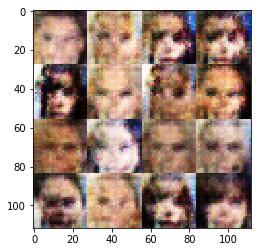

Epoch 1/1... Discriminator Loss: 1.4034... Generator Loss: 0.6777
Epoch 1/1... Discriminator Loss: 1.3809... Generator Loss: 0.6675
Epoch 1/1... Discriminator Loss: 1.3979... Generator Loss: 0.6907
Epoch 1/1... Discriminator Loss: 1.4308... Generator Loss: 0.6515
Epoch 1/1... Discriminator Loss: 1.4428... Generator Loss: 0.6780
Epoch 1/1... Discriminator Loss: 1.3913... Generator Loss: 0.6746
Epoch 1/1... Discriminator Loss: 1.3809... Generator Loss: 0.6913
Epoch 1/1... Discriminator Loss: 1.3637... Generator Loss: 0.6684
Epoch 1/1... Discriminator Loss: 1.4182... Generator Loss: 0.6504
Epoch 1/1... Discriminator Loss: 1.3860... Generator Loss: 0.6890


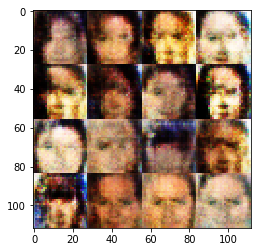

Epoch 1/1... Discriminator Loss: 1.4213... Generator Loss: 0.6380
Epoch 1/1... Discriminator Loss: 1.4242... Generator Loss: 0.6576
Epoch 1/1... Discriminator Loss: 1.4415... Generator Loss: 0.6604
Epoch 1/1... Discriminator Loss: 1.4695... Generator Loss: 0.6522
Epoch 1/1... Discriminator Loss: 1.4115... Generator Loss: 0.6804
Epoch 1/1... Discriminator Loss: 1.4112... Generator Loss: 0.6713
Epoch 1/1... Discriminator Loss: 1.3708... Generator Loss: 0.6782
Epoch 1/1... Discriminator Loss: 1.4090... Generator Loss: 0.6714
Epoch 1/1... Discriminator Loss: 1.4201... Generator Loss: 0.6350
Epoch 1/1... Discriminator Loss: 1.4293... Generator Loss: 0.6645


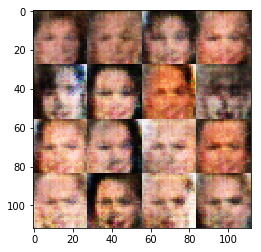

Epoch 1/1... Discriminator Loss: 1.4395... Generator Loss: 0.6657
Epoch 1/1... Discriminator Loss: 1.3509... Generator Loss: 0.6809
Epoch 1/1... Discriminator Loss: 1.3732... Generator Loss: 0.6912
Epoch 1/1... Discriminator Loss: 1.4049... Generator Loss: 0.6781
Epoch 1/1... Discriminator Loss: 1.3804... Generator Loss: 0.6820
Epoch 1/1... Discriminator Loss: 1.4283... Generator Loss: 0.6323
Epoch 1/1... Discriminator Loss: 1.3938... Generator Loss: 0.6521
Epoch 1/1... Discriminator Loss: 1.3563... Generator Loss: 0.6973
Epoch 1/1... Discriminator Loss: 1.4173... Generator Loss: 0.6642
Epoch 1/1... Discriminator Loss: 1.3968... Generator Loss: 0.6705


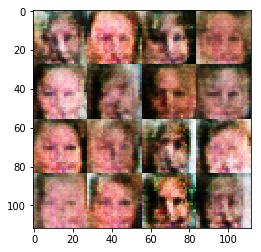

Epoch 1/1... Discriminator Loss: 1.4157... Generator Loss: 0.6636
Epoch 1/1... Discriminator Loss: 1.4295... Generator Loss: 0.6612
Epoch 1/1... Discriminator Loss: 1.4041... Generator Loss: 0.6606
Epoch 1/1... Discriminator Loss: 1.3962... Generator Loss: 0.6688
Epoch 1/1... Discriminator Loss: 1.3996... Generator Loss: 0.6688
Epoch 1/1... Discriminator Loss: 1.3951... Generator Loss: 0.6456
Epoch 1/1... Discriminator Loss: 1.3391... Generator Loss: 0.6946
Epoch 1/1... Discriminator Loss: 1.4017... Generator Loss: 0.6611
Epoch 1/1... Discriminator Loss: 1.4492... Generator Loss: 0.6452
Epoch 1/1... Discriminator Loss: 1.3788... Generator Loss: 0.6593


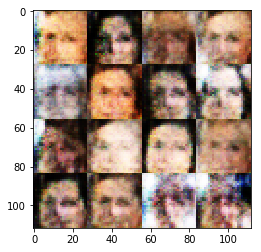

Epoch 1/1... Discriminator Loss: 1.3576... Generator Loss: 0.6990
Epoch 1/1... Discriminator Loss: 1.3804... Generator Loss: 0.6957
Epoch 1/1... Discriminator Loss: 1.3864... Generator Loss: 0.6674
Epoch 1/1... Discriminator Loss: 1.4043... Generator Loss: 0.6508
Epoch 1/1... Discriminator Loss: 1.3851... Generator Loss: 0.6683
Epoch 1/1... Discriminator Loss: 1.3478... Generator Loss: 0.7169
Epoch 1/1... Discriminator Loss: 1.3346... Generator Loss: 0.6832
Epoch 1/1... Discriminator Loss: 1.2692... Generator Loss: 0.7066
Epoch 1/1... Discriminator Loss: 1.4326... Generator Loss: 0.6658
Epoch 1/1... Discriminator Loss: 1.3715... Generator Loss: 0.6660


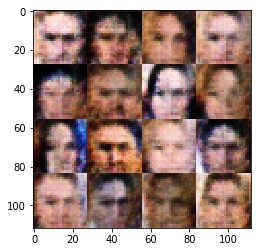

Epoch 1/1... Discriminator Loss: 1.3451... Generator Loss: 0.6896
Epoch 1/1... Discriminator Loss: 1.3750... Generator Loss: 0.7024
Epoch 1/1... Discriminator Loss: 1.3857... Generator Loss: 0.7077
Epoch 1/1... Discriminator Loss: 1.3545... Generator Loss: 0.6722
Epoch 1/1... Discriminator Loss: 1.3910... Generator Loss: 0.6897
Epoch 1/1... Discriminator Loss: 1.3376... Generator Loss: 0.7044
Epoch 1/1... Discriminator Loss: 1.3990... Generator Loss: 0.6811
Epoch 1/1... Discriminator Loss: 1.3731... Generator Loss: 0.6653
Epoch 1/1... Discriminator Loss: 1.4056... Generator Loss: 0.6516
Epoch 1/1... Discriminator Loss: 1.3995... Generator Loss: 0.6852


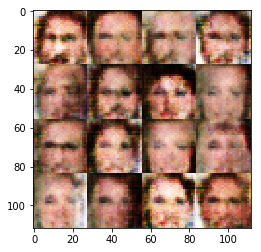

Epoch 1/1... Discriminator Loss: 1.3733... Generator Loss: 0.6584
Epoch 1/1... Discriminator Loss: 1.3396... Generator Loss: 0.6771
Epoch 1/1... Discriminator Loss: 1.3685... Generator Loss: 0.6776
Epoch 1/1... Discriminator Loss: 1.4380... Generator Loss: 0.6379
Epoch 1/1... Discriminator Loss: 1.4520... Generator Loss: 0.6350
Epoch 1/1... Discriminator Loss: 1.3853... Generator Loss: 0.6678
Epoch 1/1... Discriminator Loss: 1.3576... Generator Loss: 0.6869
Epoch 1/1... Discriminator Loss: 1.4312... Generator Loss: 0.6789
Epoch 1/1... Discriminator Loss: 1.4112... Generator Loss: 0.6547
Epoch 1/1... Discriminator Loss: 1.4086... Generator Loss: 0.6492


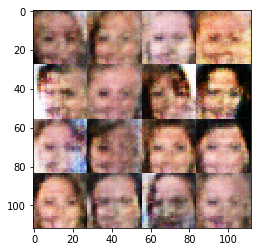

Epoch 1/1... Discriminator Loss: 1.4199... Generator Loss: 0.6531
Epoch 1/1... Discriminator Loss: 1.4434... Generator Loss: 0.6512
Epoch 1/1... Discriminator Loss: 1.4212... Generator Loss: 0.6781
Epoch 1/1... Discriminator Loss: 1.4435... Generator Loss: 0.6405
Epoch 1/1... Discriminator Loss: 1.3622... Generator Loss: 0.6837
Epoch 1/1... Discriminator Loss: 1.3490... Generator Loss: 0.6973
Epoch 1/1... Discriminator Loss: 1.3863... Generator Loss: 0.6898
Epoch 1/1... Discriminator Loss: 1.4360... Generator Loss: 0.6379
Epoch 1/1... Discriminator Loss: 1.4485... Generator Loss: 0.6472
Epoch 1/1... Discriminator Loss: 1.4098... Generator Loss: 0.6673


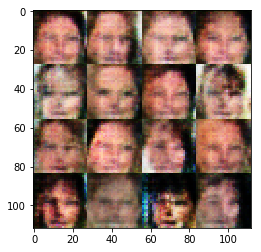

Epoch 1/1... Discriminator Loss: 1.4270... Generator Loss: 0.6557
Epoch 1/1... Discriminator Loss: 1.4377... Generator Loss: 0.6424
Epoch 1/1... Discriminator Loss: 1.4233... Generator Loss: 0.6661
Epoch 1/1... Discriminator Loss: 1.3849... Generator Loss: 0.6808
Epoch 1/1... Discriminator Loss: 1.4276... Generator Loss: 0.6598
Epoch 1/1... Discriminator Loss: 1.3562... Generator Loss: 0.6687
Epoch 1/1... Discriminator Loss: 1.3593... Generator Loss: 0.6826
Epoch 1/1... Discriminator Loss: 1.4192... Generator Loss: 0.6510
Epoch 1/1... Discriminator Loss: 1.3732... Generator Loss: 0.6929
Epoch 1/1... Discriminator Loss: 1.3855... Generator Loss: 0.6889


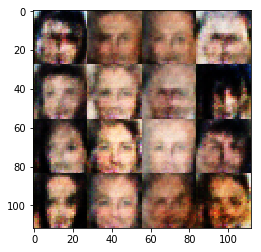

Epoch 1/1... Discriminator Loss: 1.4051... Generator Loss: 0.6542
Epoch 1/1... Discriminator Loss: 1.4499... Generator Loss: 0.6682
Epoch 1/1... Discriminator Loss: 1.3487... Generator Loss: 0.6974
Epoch 1/1... Discriminator Loss: 1.4346... Generator Loss: 0.6574
Epoch 1/1... Discriminator Loss: 1.3214... Generator Loss: 0.7188
Epoch 1/1... Discriminator Loss: 1.3554... Generator Loss: 0.6673
Epoch 1/1... Discriminator Loss: 1.3797... Generator Loss: 0.6783
Epoch 1/1... Discriminator Loss: 1.3985... Generator Loss: 0.6735
Epoch 1/1... Discriminator Loss: 1.3925... Generator Loss: 0.6559
Epoch 1/1... Discriminator Loss: 1.4320... Generator Loss: 0.6635


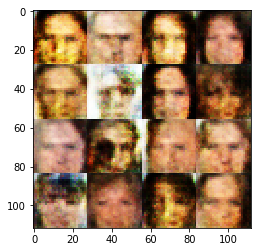

Epoch 1/1... Discriminator Loss: 1.3570... Generator Loss: 0.6950
Epoch 1/1... Discriminator Loss: 1.4478... Generator Loss: 0.6421
Epoch 1/1... Discriminator Loss: 1.4352... Generator Loss: 0.6644
Epoch 1/1... Discriminator Loss: 1.3627... Generator Loss: 0.6931
Epoch 1/1... Discriminator Loss: 1.3644... Generator Loss: 0.6811
Epoch 1/1... Discriminator Loss: 1.3533... Generator Loss: 0.6953
Epoch 1/1... Discriminator Loss: 1.3437... Generator Loss: 0.6957
Epoch 1/1... Discriminator Loss: 1.3968... Generator Loss: 0.6691
Epoch 1/1... Discriminator Loss: 1.4161... Generator Loss: 0.6662
Epoch 1/1... Discriminator Loss: 1.3834... Generator Loss: 0.6555


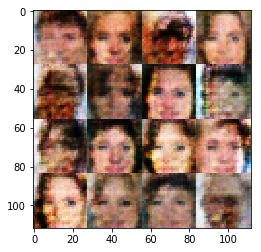

Epoch 1/1... Discriminator Loss: 1.4110... Generator Loss: 0.6693
Epoch 1/1... Discriminator Loss: 1.4353... Generator Loss: 0.6557
Epoch 1/1... Discriminator Loss: 1.3994... Generator Loss: 0.6732
Epoch 1/1... Discriminator Loss: 1.4334... Generator Loss: 0.6660
Epoch 1/1... Discriminator Loss: 1.3963... Generator Loss: 0.6748
Epoch 1/1... Discriminator Loss: 1.4227... Generator Loss: 0.6597
Epoch 1/1... Discriminator Loss: 1.4036... Generator Loss: 0.6570
Epoch 1/1... Discriminator Loss: 1.3616... Generator Loss: 0.6655
Epoch 1/1... Discriminator Loss: 1.3514... Generator Loss: 0.6955
Epoch 1/1... Discriminator Loss: 1.3391... Generator Loss: 0.6840


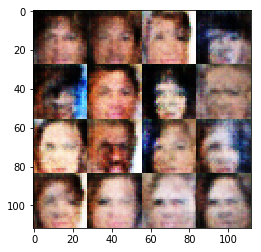

Epoch 1/1... Discriminator Loss: 1.3590... Generator Loss: 0.6892
Epoch 1/1... Discriminator Loss: 1.4191... Generator Loss: 0.6479
Epoch 1/1... Discriminator Loss: 1.3536... Generator Loss: 0.6635
Epoch 1/1... Discriminator Loss: 1.4494... Generator Loss: 0.6316
Epoch 1/1... Discriminator Loss: 1.3643... Generator Loss: 0.6686
Epoch 1/1... Discriminator Loss: 1.3605... Generator Loss: 0.6877
Epoch 1/1... Discriminator Loss: 1.3582... Generator Loss: 0.6867
Epoch 1/1... Discriminator Loss: 1.4481... Generator Loss: 0.6839
Epoch 1/1... Discriminator Loss: 1.3827... Generator Loss: 0.6449
Epoch 1/1... Discriminator Loss: 1.3558... Generator Loss: 0.6937


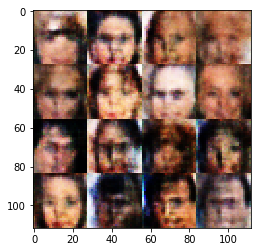

Epoch 1/1... Discriminator Loss: 1.3863... Generator Loss: 0.6963
Epoch 1/1... Discriminator Loss: 1.4221... Generator Loss: 0.6544
Epoch 1/1... Discriminator Loss: 1.4024... Generator Loss: 0.6830
Epoch 1/1... Discriminator Loss: 1.3801... Generator Loss: 0.6934
Epoch 1/1... Discriminator Loss: 1.4160... Generator Loss: 0.6509
Epoch 1/1... Discriminator Loss: 1.3725... Generator Loss: 0.6785
Epoch 1/1... Discriminator Loss: 1.3753... Generator Loss: 0.6760
Epoch 1/1... Discriminator Loss: 1.3651... Generator Loss: 0.6943
Epoch 1/1... Discriminator Loss: 1.3767... Generator Loss: 0.6712
Epoch 1/1... Discriminator Loss: 1.4100... Generator Loss: 0.6562


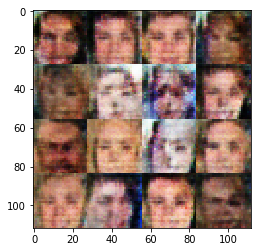

Epoch 1/1... Discriminator Loss: 1.4045... Generator Loss: 0.6888
Epoch 1/1... Discriminator Loss: 1.4010... Generator Loss: 0.6747
Epoch 1/1... Discriminator Loss: 1.4350... Generator Loss: 0.6503
Epoch 1/1... Discriminator Loss: 1.4110... Generator Loss: 0.6890
Epoch 1/1... Discriminator Loss: 1.3995... Generator Loss: 0.6988
Epoch 1/1... Discriminator Loss: 1.3382... Generator Loss: 0.7108
Epoch 1/1... Discriminator Loss: 1.4269... Generator Loss: 0.6455
Epoch 1/1... Discriminator Loss: 1.3586... Generator Loss: 0.6720
Epoch 1/1... Discriminator Loss: 1.4034... Generator Loss: 0.6359
Epoch 1/1... Discriminator Loss: 1.3671... Generator Loss: 0.6870


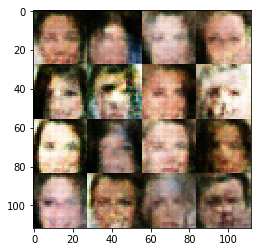

Epoch 1/1... Discriminator Loss: 1.4526... Generator Loss: 0.6531
Epoch 1/1... Discriminator Loss: 1.4293... Generator Loss: 0.6643
Epoch 1/1... Discriminator Loss: 1.4321... Generator Loss: 0.6464
Epoch 1/1... Discriminator Loss: 1.3764... Generator Loss: 0.6846
Epoch 1/1... Discriminator Loss: 1.3448... Generator Loss: 0.6819
Epoch 1/1... Discriminator Loss: 1.4285... Generator Loss: 0.6526
Epoch 1/1... Discriminator Loss: 1.3490... Generator Loss: 0.6826
Epoch 1/1... Discriminator Loss: 1.3550... Generator Loss: 0.6991
Epoch 1/1... Discriminator Loss: 1.3760... Generator Loss: 0.7189
Epoch 1/1... Discriminator Loss: 1.4203... Generator Loss: 0.6609


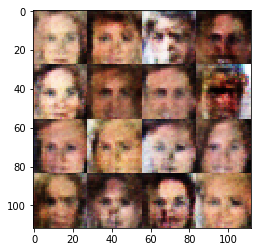

Epoch 1/1... Discriminator Loss: 1.4314... Generator Loss: 0.6866
Epoch 1/1... Discriminator Loss: 1.2609... Generator Loss: 0.7152
Epoch 1/1... Discriminator Loss: 1.3775... Generator Loss: 0.6558
Epoch 1/1... Discriminator Loss: 1.4244... Generator Loss: 0.6649
Epoch 1/1... Discriminator Loss: 1.3551... Generator Loss: 0.6979
Epoch 1/1... Discriminator Loss: 1.3507... Generator Loss: 0.6860
Epoch 1/1... Discriminator Loss: 1.4120... Generator Loss: 0.6505
Epoch 1/1... Discriminator Loss: 1.4647... Generator Loss: 0.6206
Epoch 1/1... Discriminator Loss: 1.4198... Generator Loss: 0.6654
Epoch 1/1... Discriminator Loss: 1.4077... Generator Loss: 0.6541


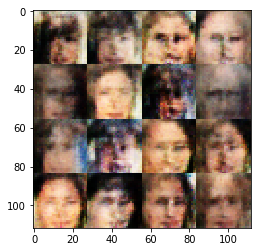

Epoch 1/1... Discriminator Loss: 1.4048... Generator Loss: 0.6834
Epoch 1/1... Discriminator Loss: 1.4058... Generator Loss: 0.6598
Epoch 1/1... Discriminator Loss: 1.3356... Generator Loss: 0.7085
Epoch 1/1... Discriminator Loss: 1.3446... Generator Loss: 0.6986
Epoch 1/1... Discriminator Loss: 1.4022... Generator Loss: 0.6856
Epoch 1/1... Discriminator Loss: 1.3972... Generator Loss: 0.6377
Epoch 1/1... Discriminator Loss: 1.3396... Generator Loss: 0.7076
Epoch 1/1... Discriminator Loss: 1.3708... Generator Loss: 0.6837
Epoch 1/1... Discriminator Loss: 1.4010... Generator Loss: 0.6875
Epoch 1/1... Discriminator Loss: 1.4647... Generator Loss: 0.6324


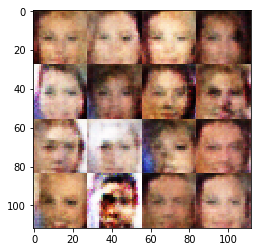

Epoch 1/1... Discriminator Loss: 1.3990... Generator Loss: 0.6547
Epoch 1/1... Discriminator Loss: 1.3741... Generator Loss: 0.6850
Epoch 1/1... Discriminator Loss: 1.3432... Generator Loss: 0.7004
Epoch 1/1... Discriminator Loss: 1.3474... Generator Loss: 0.6923
Epoch 1/1... Discriminator Loss: 1.4182... Generator Loss: 0.6445
Epoch 1/1... Discriminator Loss: 1.4297... Generator Loss: 0.6524
Epoch 1/1... Discriminator Loss: 1.3292... Generator Loss: 0.6859
Epoch 1/1... Discriminator Loss: 1.3812... Generator Loss: 0.6814
Epoch 1/1... Discriminator Loss: 1.3305... Generator Loss: 0.7071
Epoch 1/1... Discriminator Loss: 1.3741... Generator Loss: 0.6773


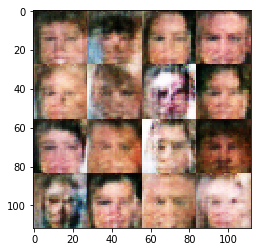

Epoch 1/1... Discriminator Loss: 1.4944... Generator Loss: 0.6254
Epoch 1/1... Discriminator Loss: 1.4176... Generator Loss: 0.6409
Epoch 1/1... Discriminator Loss: 1.4047... Generator Loss: 0.6863
Epoch 1/1... Discriminator Loss: 1.3677... Generator Loss: 0.6696
Epoch 1/1... Discriminator Loss: 1.4063... Generator Loss: 0.6745
Epoch 1/1... Discriminator Loss: 1.4321... Generator Loss: 0.6694
Epoch 1/1... Discriminator Loss: 1.3549... Generator Loss: 0.6848
Epoch 1/1... Discriminator Loss: 1.4065... Generator Loss: 0.6868
Epoch 1/1... Discriminator Loss: 1.3419... Generator Loss: 0.6990
Epoch 1/1... Discriminator Loss: 1.4046... Generator Loss: 0.6650


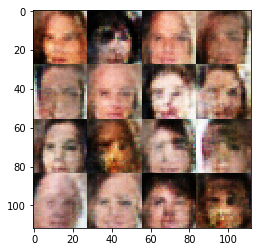

Epoch 1/1... Discriminator Loss: 1.3600... Generator Loss: 0.6819
Epoch 1/1... Discriminator Loss: 1.4354... Generator Loss: 0.6487
Epoch 1/1... Discriminator Loss: 1.3858... Generator Loss: 0.6585
Epoch 1/1... Discriminator Loss: 1.3891... Generator Loss: 0.6641
Epoch 1/1... Discriminator Loss: 1.4695... Generator Loss: 0.6267
Epoch 1/1... Discriminator Loss: 1.3962... Generator Loss: 0.6638
Epoch 1/1... Discriminator Loss: 1.3575... Generator Loss: 0.6807
Epoch 1/1... Discriminator Loss: 1.4072... Generator Loss: 0.6526
Epoch 1/1... Discriminator Loss: 1.4379... Generator Loss: 0.6499
Epoch 1/1... Discriminator Loss: 1.3416... Generator Loss: 0.6994


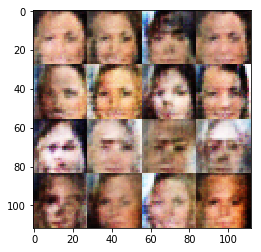

Epoch 1/1... Discriminator Loss: 1.3255... Generator Loss: 0.6890
Epoch 1/1... Discriminator Loss: 1.4260... Generator Loss: 0.6598
Epoch 1/1... Discriminator Loss: 1.4558... Generator Loss: 0.6511
Epoch 1/1... Discriminator Loss: 1.3454... Generator Loss: 0.6772
Epoch 1/1... Discriminator Loss: 1.4255... Generator Loss: 0.6528
Epoch 1/1... Discriminator Loss: 1.3940... Generator Loss: 0.6656
Epoch 1/1... Discriminator Loss: 1.3257... Generator Loss: 0.7092
Epoch 1/1... Discriminator Loss: 1.3750... Generator Loss: 0.7084
Epoch 1/1... Discriminator Loss: 1.3972... Generator Loss: 0.6787
Epoch 1/1... Discriminator Loss: 1.3519... Generator Loss: 0.7120


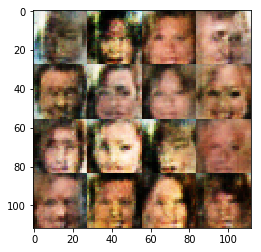

Epoch 1/1... Discriminator Loss: 1.4756... Generator Loss: 0.6153
Epoch 1/1... Discriminator Loss: 1.4415... Generator Loss: 0.6667
Epoch 1/1... Discriminator Loss: 1.3872... Generator Loss: 0.6877
Epoch 1/1... Discriminator Loss: 1.3686... Generator Loss: 0.7042
Epoch 1/1... Discriminator Loss: 1.4050... Generator Loss: 0.6874
Epoch 1/1... Discriminator Loss: 1.3948... Generator Loss: 0.6736
Epoch 1/1... Discriminator Loss: 1.4463... Generator Loss: 0.6403
Epoch 1/1... Discriminator Loss: 1.3820... Generator Loss: 0.6920
Epoch 1/1... Discriminator Loss: 1.3894... Generator Loss: 0.6771
Epoch 1/1... Discriminator Loss: 1.3980... Generator Loss: 0.6651


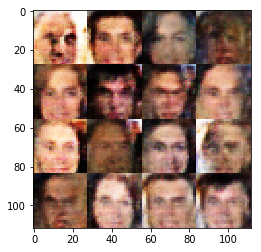

Epoch 1/1... Discriminator Loss: 1.2927... Generator Loss: 0.7400
Epoch 1/1... Discriminator Loss: 1.3624... Generator Loss: 0.6765
Epoch 1/1... Discriminator Loss: 1.3872... Generator Loss: 0.6903
Epoch 1/1... Discriminator Loss: 1.3569... Generator Loss: 0.6828
Epoch 1/1... Discriminator Loss: 1.4208... Generator Loss: 0.6372
Epoch 1/1... Discriminator Loss: 1.3923... Generator Loss: 0.6674
Epoch 1/1... Discriminator Loss: 1.4287... Generator Loss: 0.6733
Epoch 1/1... Discriminator Loss: 1.3855... Generator Loss: 0.6822
Epoch 1/1... Discriminator Loss: 1.3758... Generator Loss: 0.6674
Epoch 1/1... Discriminator Loss: 1.3611... Generator Loss: 0.6742


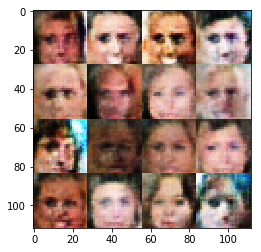

Epoch 1/1... Discriminator Loss: 1.3894... Generator Loss: 0.6645
Epoch 1/1... Discriminator Loss: 1.3920... Generator Loss: 0.6886
Epoch 1/1... Discriminator Loss: 1.3690... Generator Loss: 0.6818
Epoch 1/1... Discriminator Loss: 1.4134... Generator Loss: 0.6645
Epoch 1/1... Discriminator Loss: 1.4169... Generator Loss: 0.6587
Epoch 1/1... Discriminator Loss: 1.4236... Generator Loss: 0.6718
Epoch 1/1... Discriminator Loss: 1.4540... Generator Loss: 0.6682
Epoch 1/1... Discriminator Loss: 1.3269... Generator Loss: 0.7061
Epoch 1/1... Discriminator Loss: 1.4404... Generator Loss: 0.6584
Epoch 1/1... Discriminator Loss: 1.3747... Generator Loss: 0.6860


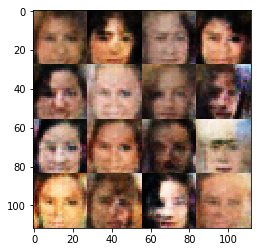

Epoch 1/1... Discriminator Loss: 1.4479... Generator Loss: 0.6306
Epoch 1/1... Discriminator Loss: 1.4091... Generator Loss: 0.6591
Epoch 1/1... Discriminator Loss: 1.4026... Generator Loss: 0.6456
Epoch 1/1... Discriminator Loss: 1.4147... Generator Loss: 0.6676
Epoch 1/1... Discriminator Loss: 1.3820... Generator Loss: 0.6846
Epoch 1/1... Discriminator Loss: 1.3790... Generator Loss: 0.6800
Epoch 1/1... Discriminator Loss: 1.4373... Generator Loss: 0.6525
Epoch 1/1... Discriminator Loss: 1.4058... Generator Loss: 0.6589
Epoch 1/1... Discriminator Loss: 1.4531... Generator Loss: 0.6557
Epoch 1/1... Discriminator Loss: 1.4760... Generator Loss: 0.6235


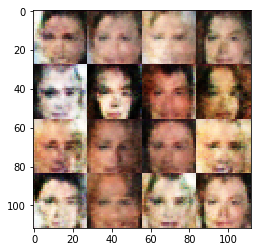

Epoch 1/1... Discriminator Loss: 1.4467... Generator Loss: 0.6536
Epoch 1/1... Discriminator Loss: 1.3905... Generator Loss: 0.6927
Epoch 1/1... Discriminator Loss: 1.3903... Generator Loss: 0.6553
Epoch 1/1... Discriminator Loss: 1.3963... Generator Loss: 0.6786
Epoch 1/1... Discriminator Loss: 1.3872... Generator Loss: 0.6791
Epoch 1/1... Discriminator Loss: 1.3687... Generator Loss: 0.6952
Epoch 1/1... Discriminator Loss: 1.3556... Generator Loss: 0.6723
Epoch 1/1... Discriminator Loss: 1.4423... Generator Loss: 0.6705
Epoch 1/1... Discriminator Loss: 1.4407... Generator Loss: 0.6636
Epoch 1/1... Discriminator Loss: 1.3767... Generator Loss: 0.6579


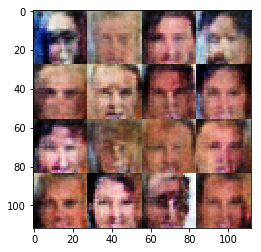

Epoch 1/1... Discriminator Loss: 1.4114... Generator Loss: 0.6828
Epoch 1/1... Discriminator Loss: 1.4243... Generator Loss: 0.6482
Epoch 1/1... Discriminator Loss: 1.4084... Generator Loss: 0.6624
Epoch 1/1... Discriminator Loss: 1.4231... Generator Loss: 0.6518
Epoch 1/1... Discriminator Loss: 1.3570... Generator Loss: 0.6947
Epoch 1/1... Discriminator Loss: 1.4572... Generator Loss: 0.6196
Epoch 1/1... Discriminator Loss: 1.3424... Generator Loss: 0.6914
Epoch 1/1... Discriminator Loss: 1.3996... Generator Loss: 0.6745
Epoch 1/1... Discriminator Loss: 1.4056... Generator Loss: 0.6696
Epoch 1/1... Discriminator Loss: 1.3742... Generator Loss: 0.7029


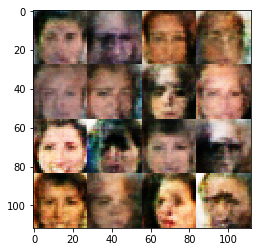

Epoch 1/1... Discriminator Loss: 1.3571... Generator Loss: 0.6869
Epoch 1/1... Discriminator Loss: 1.4088... Generator Loss: 0.6526
Epoch 1/1... Discriminator Loss: 1.3848... Generator Loss: 0.6669
Epoch 1/1... Discriminator Loss: 1.4199... Generator Loss: 0.6773
Epoch 1/1... Discriminator Loss: 1.3707... Generator Loss: 0.6961
Epoch 1/1... Discriminator Loss: 1.3685... Generator Loss: 0.6876
Epoch 1/1... Discriminator Loss: 1.3668... Generator Loss: 0.6878
Epoch 1/1... Discriminator Loss: 1.3888... Generator Loss: 0.6837
Epoch 1/1... Discriminator Loss: 1.3949... Generator Loss: 0.6644
Epoch 1/1... Discriminator Loss: 1.4210... Generator Loss: 0.6549


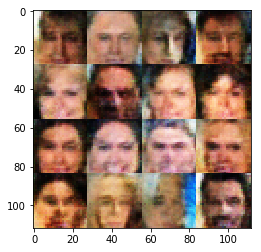

Epoch 1/1... Discriminator Loss: 1.4348... Generator Loss: 0.6538
Epoch 1/1... Discriminator Loss: 1.4296... Generator Loss: 0.6465
Epoch 1/1... Discriminator Loss: 1.4146... Generator Loss: 0.6654
Epoch 1/1... Discriminator Loss: 1.3488... Generator Loss: 0.6768
Epoch 1/1... Discriminator Loss: 1.3589... Generator Loss: 0.6880
Epoch 1/1... Discriminator Loss: 1.3646... Generator Loss: 0.6800
Epoch 1/1... Discriminator Loss: 1.3961... Generator Loss: 0.6763
Epoch 1/1... Discriminator Loss: 1.4339... Generator Loss: 0.6464
Epoch 1/1... Discriminator Loss: 1.4037... Generator Loss: 0.6891
Epoch 1/1... Discriminator Loss: 1.4223... Generator Loss: 0.6720


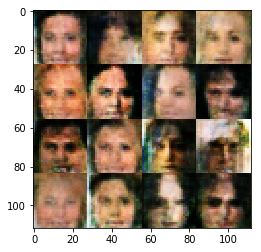

Epoch 1/1... Discriminator Loss: 1.4010... Generator Loss: 0.6703
Epoch 1/1... Discriminator Loss: 1.3862... Generator Loss: 0.6740
Epoch 1/1... Discriminator Loss: 1.3829... Generator Loss: 0.6901
Epoch 1/1... Discriminator Loss: 1.4256... Generator Loss: 0.6616
Epoch 1/1... Discriminator Loss: 1.4132... Generator Loss: 0.6326
Epoch 1/1... Discriminator Loss: 1.3818... Generator Loss: 0.6742
Epoch 1/1... Discriminator Loss: 1.3940... Generator Loss: 0.6877
Epoch 1/1... Discriminator Loss: 1.4520... Generator Loss: 0.6209
Epoch 1/1... Discriminator Loss: 1.4123... Generator Loss: 0.6648
Epoch 1/1... Discriminator Loss: 1.3940... Generator Loss: 0.6797


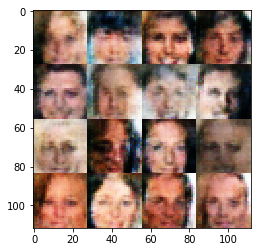

Epoch 1/1... Discriminator Loss: 1.3825... Generator Loss: 0.6418
Epoch 1/1... Discriminator Loss: 1.3173... Generator Loss: 0.7314
Epoch 1/1... Discriminator Loss: 1.4100... Generator Loss: 0.6891
Epoch 1/1... Discriminator Loss: 1.3681... Generator Loss: 0.6618
Epoch 1/1... Discriminator Loss: 1.4210... Generator Loss: 0.6892
Epoch 1/1... Discriminator Loss: 1.4728... Generator Loss: 0.6392
Epoch 1/1... Discriminator Loss: 1.4417... Generator Loss: 0.6050
Epoch 1/1... Discriminator Loss: 1.4249... Generator Loss: 0.6857
Epoch 1/1... Discriminator Loss: 1.3874... Generator Loss: 0.6996
Epoch 1/1... Discriminator Loss: 1.3636... Generator Loss: 0.6515


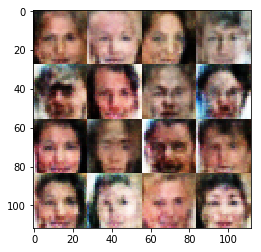

Epoch 1/1... Discriminator Loss: 1.3724... Generator Loss: 0.6786
Epoch 1/1... Discriminator Loss: 1.4139... Generator Loss: 0.6698
Epoch 1/1... Discriminator Loss: 1.3934... Generator Loss: 0.6993
Epoch 1/1... Discriminator Loss: 1.3866... Generator Loss: 0.6869
Epoch 1/1... Discriminator Loss: 1.4172... Generator Loss: 0.6513
Epoch 1/1... Discriminator Loss: 1.3859... Generator Loss: 0.6973
Epoch 1/1... Discriminator Loss: 1.3849... Generator Loss: 0.6720
Epoch 1/1... Discriminator Loss: 1.3823... Generator Loss: 0.6640
Epoch 1/1... Discriminator Loss: 1.4162... Generator Loss: 0.6691
Epoch 1/1... Discriminator Loss: 1.3998... Generator Loss: 0.6870


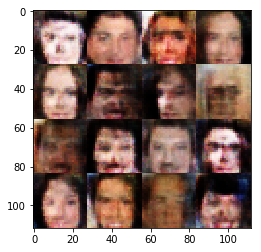

Epoch 1/1... Discriminator Loss: 1.4078... Generator Loss: 0.6592
Epoch 1/1... Discriminator Loss: 1.3448... Generator Loss: 0.6977
Epoch 1/1... Discriminator Loss: 1.4218... Generator Loss: 0.6423
Epoch 1/1... Discriminator Loss: 1.4030... Generator Loss: 0.6820
Epoch 1/1... Discriminator Loss: 1.4111... Generator Loss: 0.6896
Epoch 1/1... Discriminator Loss: 1.3713... Generator Loss: 0.6787
Epoch 1/1... Discriminator Loss: 1.4162... Generator Loss: 0.6663
Epoch 1/1... Discriminator Loss: 1.4194... Generator Loss: 0.6581
Epoch 1/1... Discriminator Loss: 1.4339... Generator Loss: 0.6652
Epoch 1/1... Discriminator Loss: 1.4141... Generator Loss: 0.6732


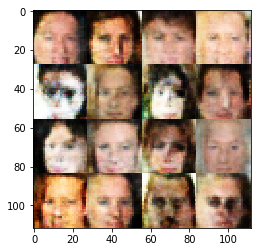

Epoch 1/1... Discriminator Loss: 1.3863... Generator Loss: 0.6602
Epoch 1/1... Discriminator Loss: 1.4329... Generator Loss: 0.6569
Epoch 1/1... Discriminator Loss: 1.3862... Generator Loss: 0.6866
Epoch 1/1... Discriminator Loss: 1.3864... Generator Loss: 0.6862
Epoch 1/1... Discriminator Loss: 1.3591... Generator Loss: 0.6801
Epoch 1/1... Discriminator Loss: 1.4130... Generator Loss: 0.6758
Epoch 1/1... Discriminator Loss: 1.3451... Generator Loss: 0.7048
Epoch 1/1... Discriminator Loss: 1.3867... Generator Loss: 0.6889
Epoch 1/1... Discriminator Loss: 1.4251... Generator Loss: 0.6511
Epoch 1/1... Discriminator Loss: 1.4106... Generator Loss: 0.6688


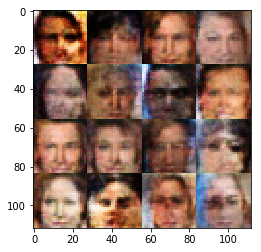

Epoch 1/1... Discriminator Loss: 1.4017... Generator Loss: 0.6997
Epoch 1/1... Discriminator Loss: 1.4046... Generator Loss: 0.6753
Epoch 1/1... Discriminator Loss: 1.3852... Generator Loss: 0.6829
Epoch 1/1... Discriminator Loss: 1.3959... Generator Loss: 0.6587
Epoch 1/1... Discriminator Loss: 1.4187... Generator Loss: 0.6798
Epoch 1/1... Discriminator Loss: 1.3958... Generator Loss: 0.6926
Epoch 1/1... Discriminator Loss: 1.4144... Generator Loss: 0.6669
Epoch 1/1... Discriminator Loss: 1.3753... Generator Loss: 0.6989
Epoch 1/1... Discriminator Loss: 1.4145... Generator Loss: 0.6628
Epoch 1/1... Discriminator Loss: 1.4056... Generator Loss: 0.6817


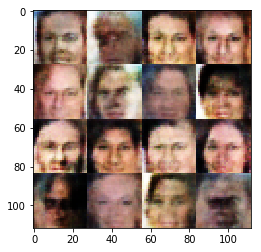

Epoch 1/1... Discriminator Loss: 1.3322... Generator Loss: 0.6814
Epoch 1/1... Discriminator Loss: 1.4245... Generator Loss: 0.6544
Epoch 1/1... Discriminator Loss: 1.4058... Generator Loss: 0.6683
Epoch 1/1... Discriminator Loss: 1.3940... Generator Loss: 0.6880
Epoch 1/1... Discriminator Loss: 1.4231... Generator Loss: 0.6576
Epoch 1/1... Discriminator Loss: 1.4015... Generator Loss: 0.6907
Epoch 1/1... Discriminator Loss: 1.4291... Generator Loss: 0.6702
Epoch 1/1... Discriminator Loss: 1.4151... Generator Loss: 0.6554
Epoch 1/1... Discriminator Loss: 1.3676... Generator Loss: 0.6962
Epoch 1/1... Discriminator Loss: 1.3591... Generator Loss: 0.7007


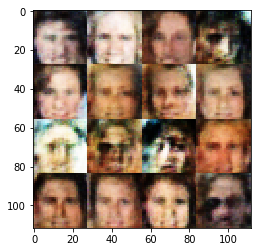

Epoch 1/1... Discriminator Loss: 1.3384... Generator Loss: 0.7169
Epoch 1/1... Discriminator Loss: 1.4970... Generator Loss: 0.6571
Epoch 1/1... Discriminator Loss: 1.3712... Generator Loss: 0.6891
Epoch 1/1... Discriminator Loss: 1.3061... Generator Loss: 0.6834
Epoch 1/1... Discriminator Loss: 1.4663... Generator Loss: 0.6705
Epoch 1/1... Discriminator Loss: 1.4172... Generator Loss: 0.6619
Epoch 1/1... Discriminator Loss: 1.4675... Generator Loss: 0.6282
Epoch 1/1... Discriminator Loss: 1.3687... Generator Loss: 0.6644
Epoch 1/1... Discriminator Loss: 1.3777... Generator Loss: 0.6649
Epoch 1/1... Discriminator Loss: 1.4059... Generator Loss: 0.6547


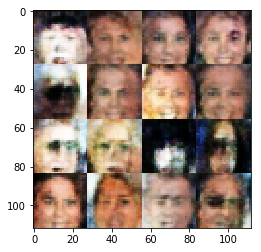

Epoch 1/1... Discriminator Loss: 1.3758... Generator Loss: 0.6829
Epoch 1/1... Discriminator Loss: 1.3901... Generator Loss: 0.6800
Epoch 1/1... Discriminator Loss: 1.3950... Generator Loss: 0.6655


In [22]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.